# CA5 - Pepper Spiciness Prediction
### Jony Karmakar

### Imports

In [253]:
# Importing Libaries
# ======================
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import make_scorer, mean_absolute_error

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict

### Reading data

In [19]:
# Loading the dataset 
# ======================
df_train = pd.read_csv('train.csv', index_col=False)
df_test = pd.read_csv('test.csv', index_col=False)

### Data exploration and visualisation

In [42]:
# Printing the first 10 rows of the dataframe with head(10)
# =========================================================
df_train.head(20)

,Length (cm),Width (cm),Weight (g),Pericarp Thickness (mm),Seed Count,Capsaicin Content,Vitamin C Content (mg),Sugar Content,Moisture Content,Firmness,color,Harvest Time,Average Daily Temperature During Growth (celcius),Average Temperature During Storage (celcius),Scoville Heat Units (SHU)
0,17.37,5.42,94.30,4.90,193.93,3.21,173.59,6.15,88.59,3.40,red,Midday,8.68,5-6,0.00
1,27.78,4.75,262.71,6.56,186.29,8.19,100.41,2.36,111.20,5.45,green,Midday,22.44,NaN,0.00
2,6.17,3.51,66.72,7.96,298.81,4.69,125.91,6.75,72.98,2.77,red,Midday,24.99,NaN,455995.06
3,6.12,6.07,51.24,4.57,39.36,2.76,143.54,5.93,63.93,1.62,yellow,Midday,13.05,NaN,0.00
4,28.58,4.84,166.51,3.07,194.07,7.01,193.76,2.85,88.19,3.99,red,Midday,27.08,NaN,0.00
5,13.80,8.64,189.24,4.32,72.27,2.38,140.15,4.60,117.75,3.21,yellow,Morning,24.95,NaN,0.00
6,9.15,8.40,74.69,1.70,8.45,6.22,68.89,4.02,101.63,5.54,yellow,Midday,31.34,NaN,70571.10
7,12.40,10.68,159.72,10.28,239.54,11.08,28.62,4.32,94.90,5.56,green,Midday,18.53,NaN,0.00
8,18.90,7.66,57.72,4.63,87.10,6.74,34.05,0.65,82.13,4.32,yellow,Midday,16.14,NaN,31362.49
9,35.57,8.82,633.31,6.92,244.27,0.84,312.63,0.84,84.36,2.63,red,Morning,21.27,NaN,0.00


In [21]:
# Checking the info of the dataset
# ================================
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Length (cm)                                        999 non-null    float64
 1   Width (cm)                                         999 non-null    float64
 2   Weight (g)                                         999 non-null    float64
 3   Pericarp Thickness (mm)                            998 non-null    float64
 4   Seed Count                                         999 non-null    float64
 5   Capsaicin Content                                  999 non-null    float64
 6   Vitamin C Content (mg)                             1000 non-null   float64
 7   Sugar Content                                      999 non-null    float64
 8   Moisture Content                                   1000 non-null   float64
 9   Firmness 

In [22]:
# Showing descriptive statistics of the dataset
# ==============================================
df_train.describe()

,Length (cm),Width (cm),Weight (g),Pericarp Thickness (mm),Seed Count,Capsaicin Content,Vitamin C Content (mg),Sugar Content,Moisture Content,Firmness,Average Daily Temperature During Growth (celcius),Scoville Heat Units (SHU)
count,999.000000,999.000000,999.000000,998.000000,999.000000,999.000000,1000.000000,999.000000,1000.000000,999.000000,1000.000000,1000.000000
mean,15.574675,6.641572,169.346406,4.619499,128.731301,4.215385,142.035180,3.283534,90.878380,3.679179,19.641960,70941.260020
std,6.267303,2.139023,123.779026,2.829503,87.270366,3.163125,72.246142,1.938264,18.724314,1.034726,6.436255,108149.917069
min,0.300000,0.100000,0.560000,0.000000,0.040000,0.010000,0.950000,0.010000,31.400000,0.850000,0.840000,0.000000
25%,11.290000,5.140000,79.020000,2.400000,55.390000,1.710000,92.290000,1.865000,78.585000,2.980000,15.397500,0.000000
50%,15.520000,6.600000,147.230000,4.280000,119.490000,3.590000,141.730000,3.140000,89.690000,3.660000,19.495000,0.000000
75%,19.900000,8.045000,227.625000,6.560000,186.845000,6.115000,192.720000,4.555000,103.200000,4.375000,23.530000,121349.617500
max,35.570000,13.620000,869.970000,14.630000,487.260000,19.020000,450.290000,9.360000,158.300000,8.250000,40.700000,527639.860000


In [23]:
#Cheking for missing data
# =======================
null_counts = df_train.isnull().sum().sum()
print(f'Total Missing values: {null_counts}' )

Total Missing values: 658


In [43]:
# Checking for missing data for each column
# =========================================
missing_data = df_train.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data

Length (cm)                                       1
Width (cm)                                        1
Weight (g)                                        1
Pericarp Thickness (mm)                           2
Seed Count                                        1
Capsaicin Content                                 1
Sugar Content                                     1
Firmness                                          1
color                                             1
Average Temperature During Storage (celcius)    648
dtype: int64

In [24]:
# Checking for duplicates in the dataset
# =======================================
duplicates = df_train.duplicated().sum()
print(f'Total duplicates: {duplicates}')

Total duplicates: 0


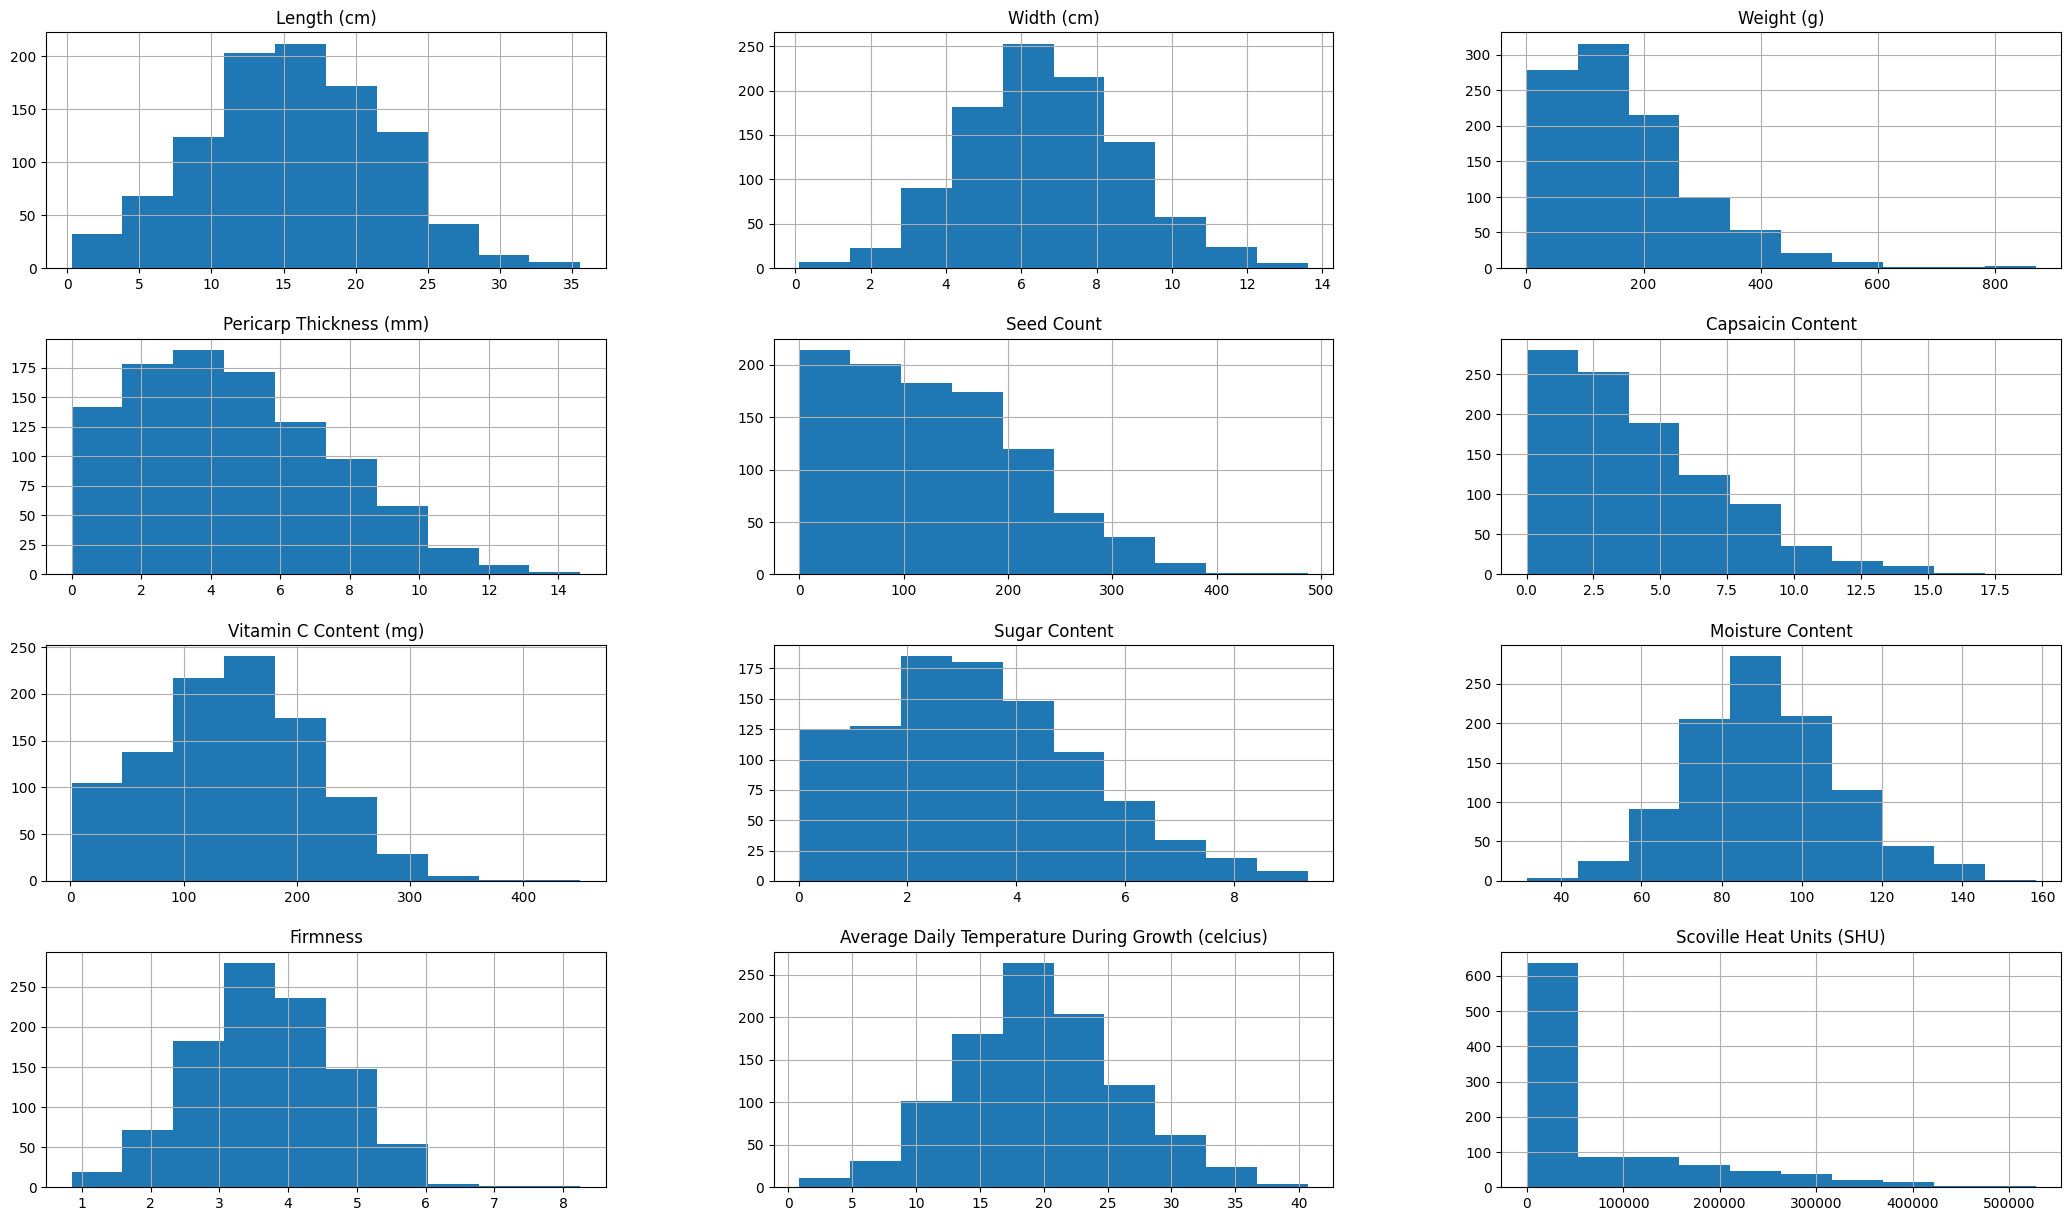

In [25]:
# Plotting histograms for all columns in the dataset
# ==================================================
df_train.hist(bins=10, figsize=(26, 15))
plt.show()

In [ ]:
for column in df_train.columns:
    if df_train[column].dtype == 'object':
        df_train[column].value_counts().plot(kind='bar')
        plt.title(column)
        plt.show()

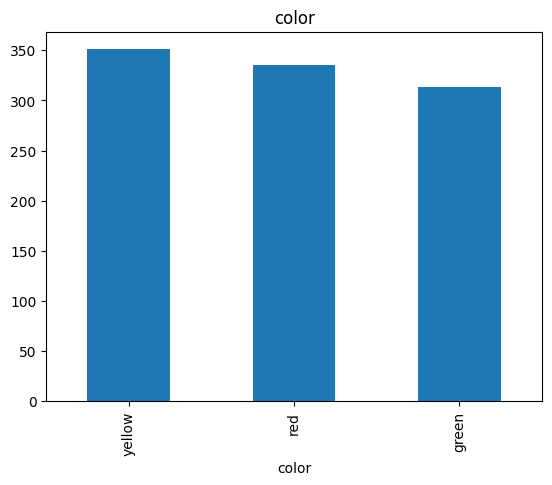

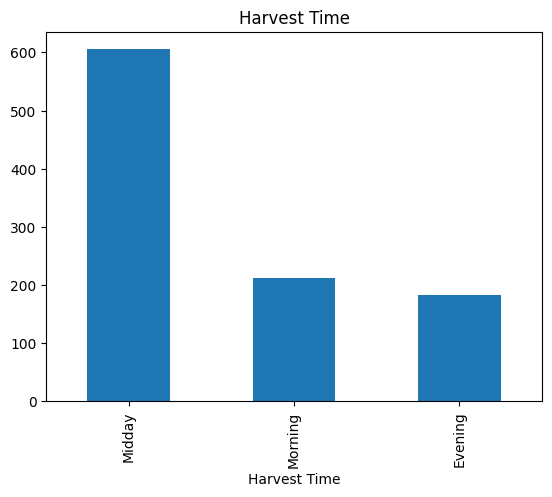

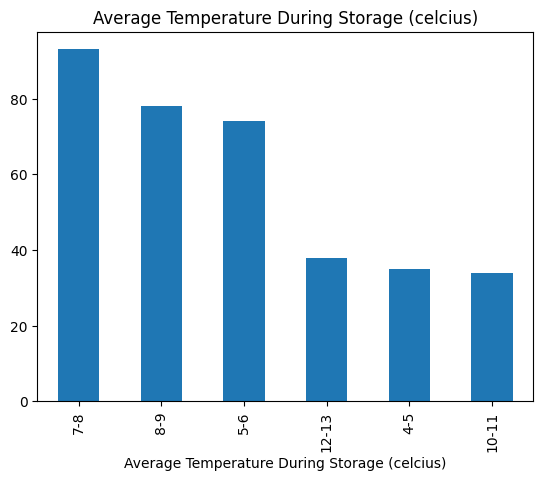

In [39]:
# Plotting histograms for object columns in the dataset using value_counts
# =========================================================================
for column in df_train.columns:
    if df_train[column].dtype == 'object':
        df_train[column].value_counts().plot(kind='bar')
        plt.title(column)
        plt.show()


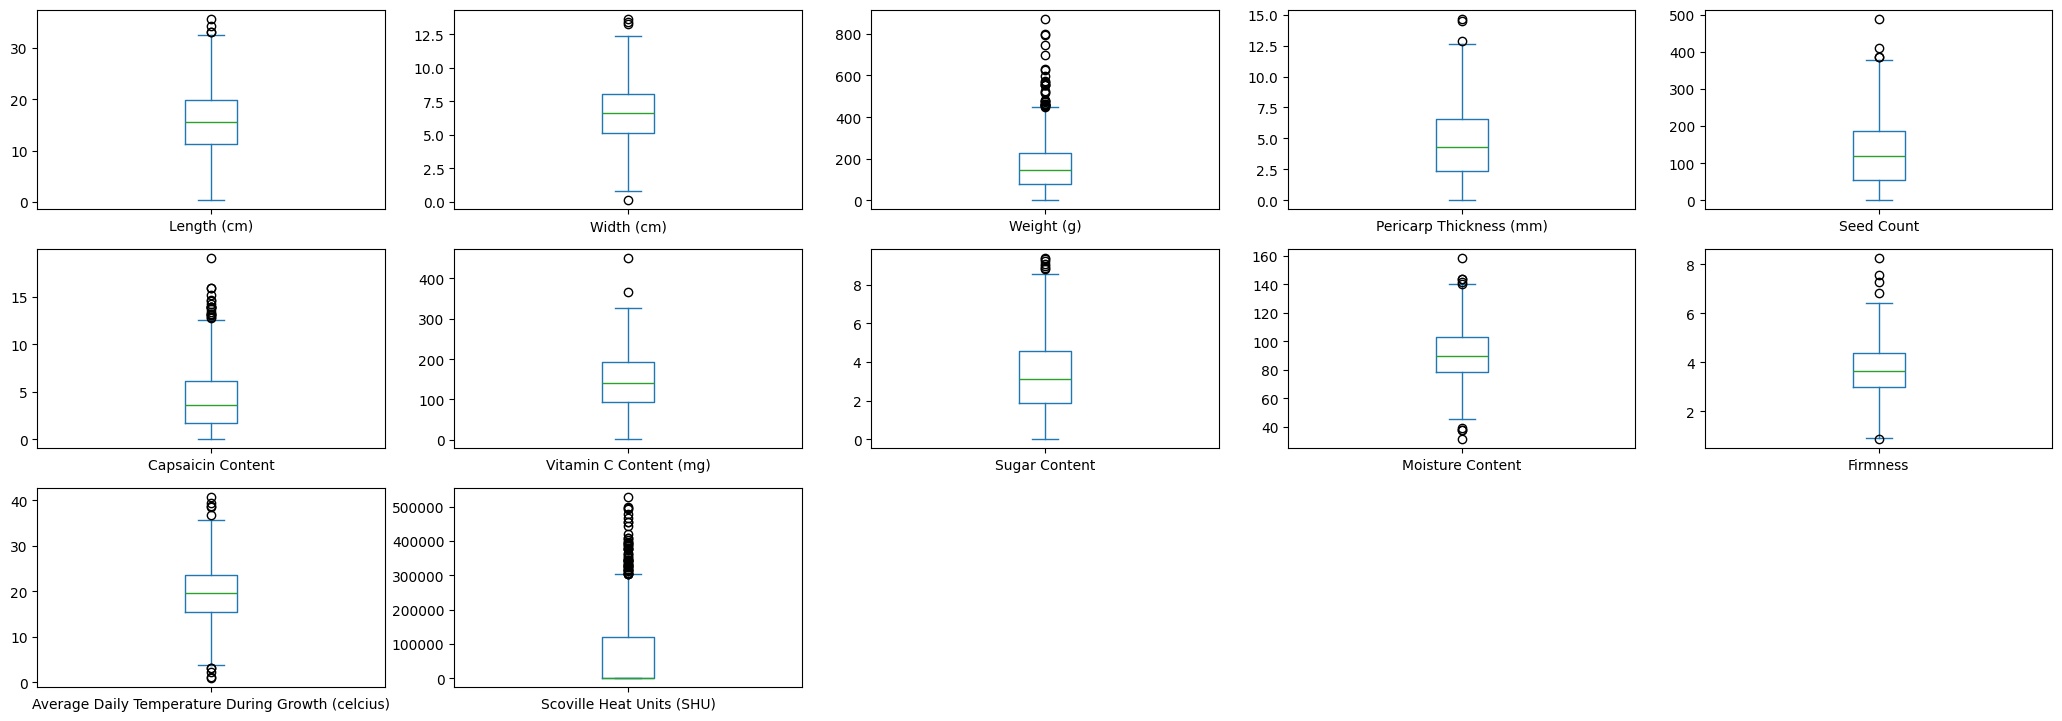

In [26]:
# Plotting Boxplots for all columns in the dataset
# ================================================
df_train.plot(kind='box', subplots=True, layout=(5,5), figsize=(26, 15))
plt.show()

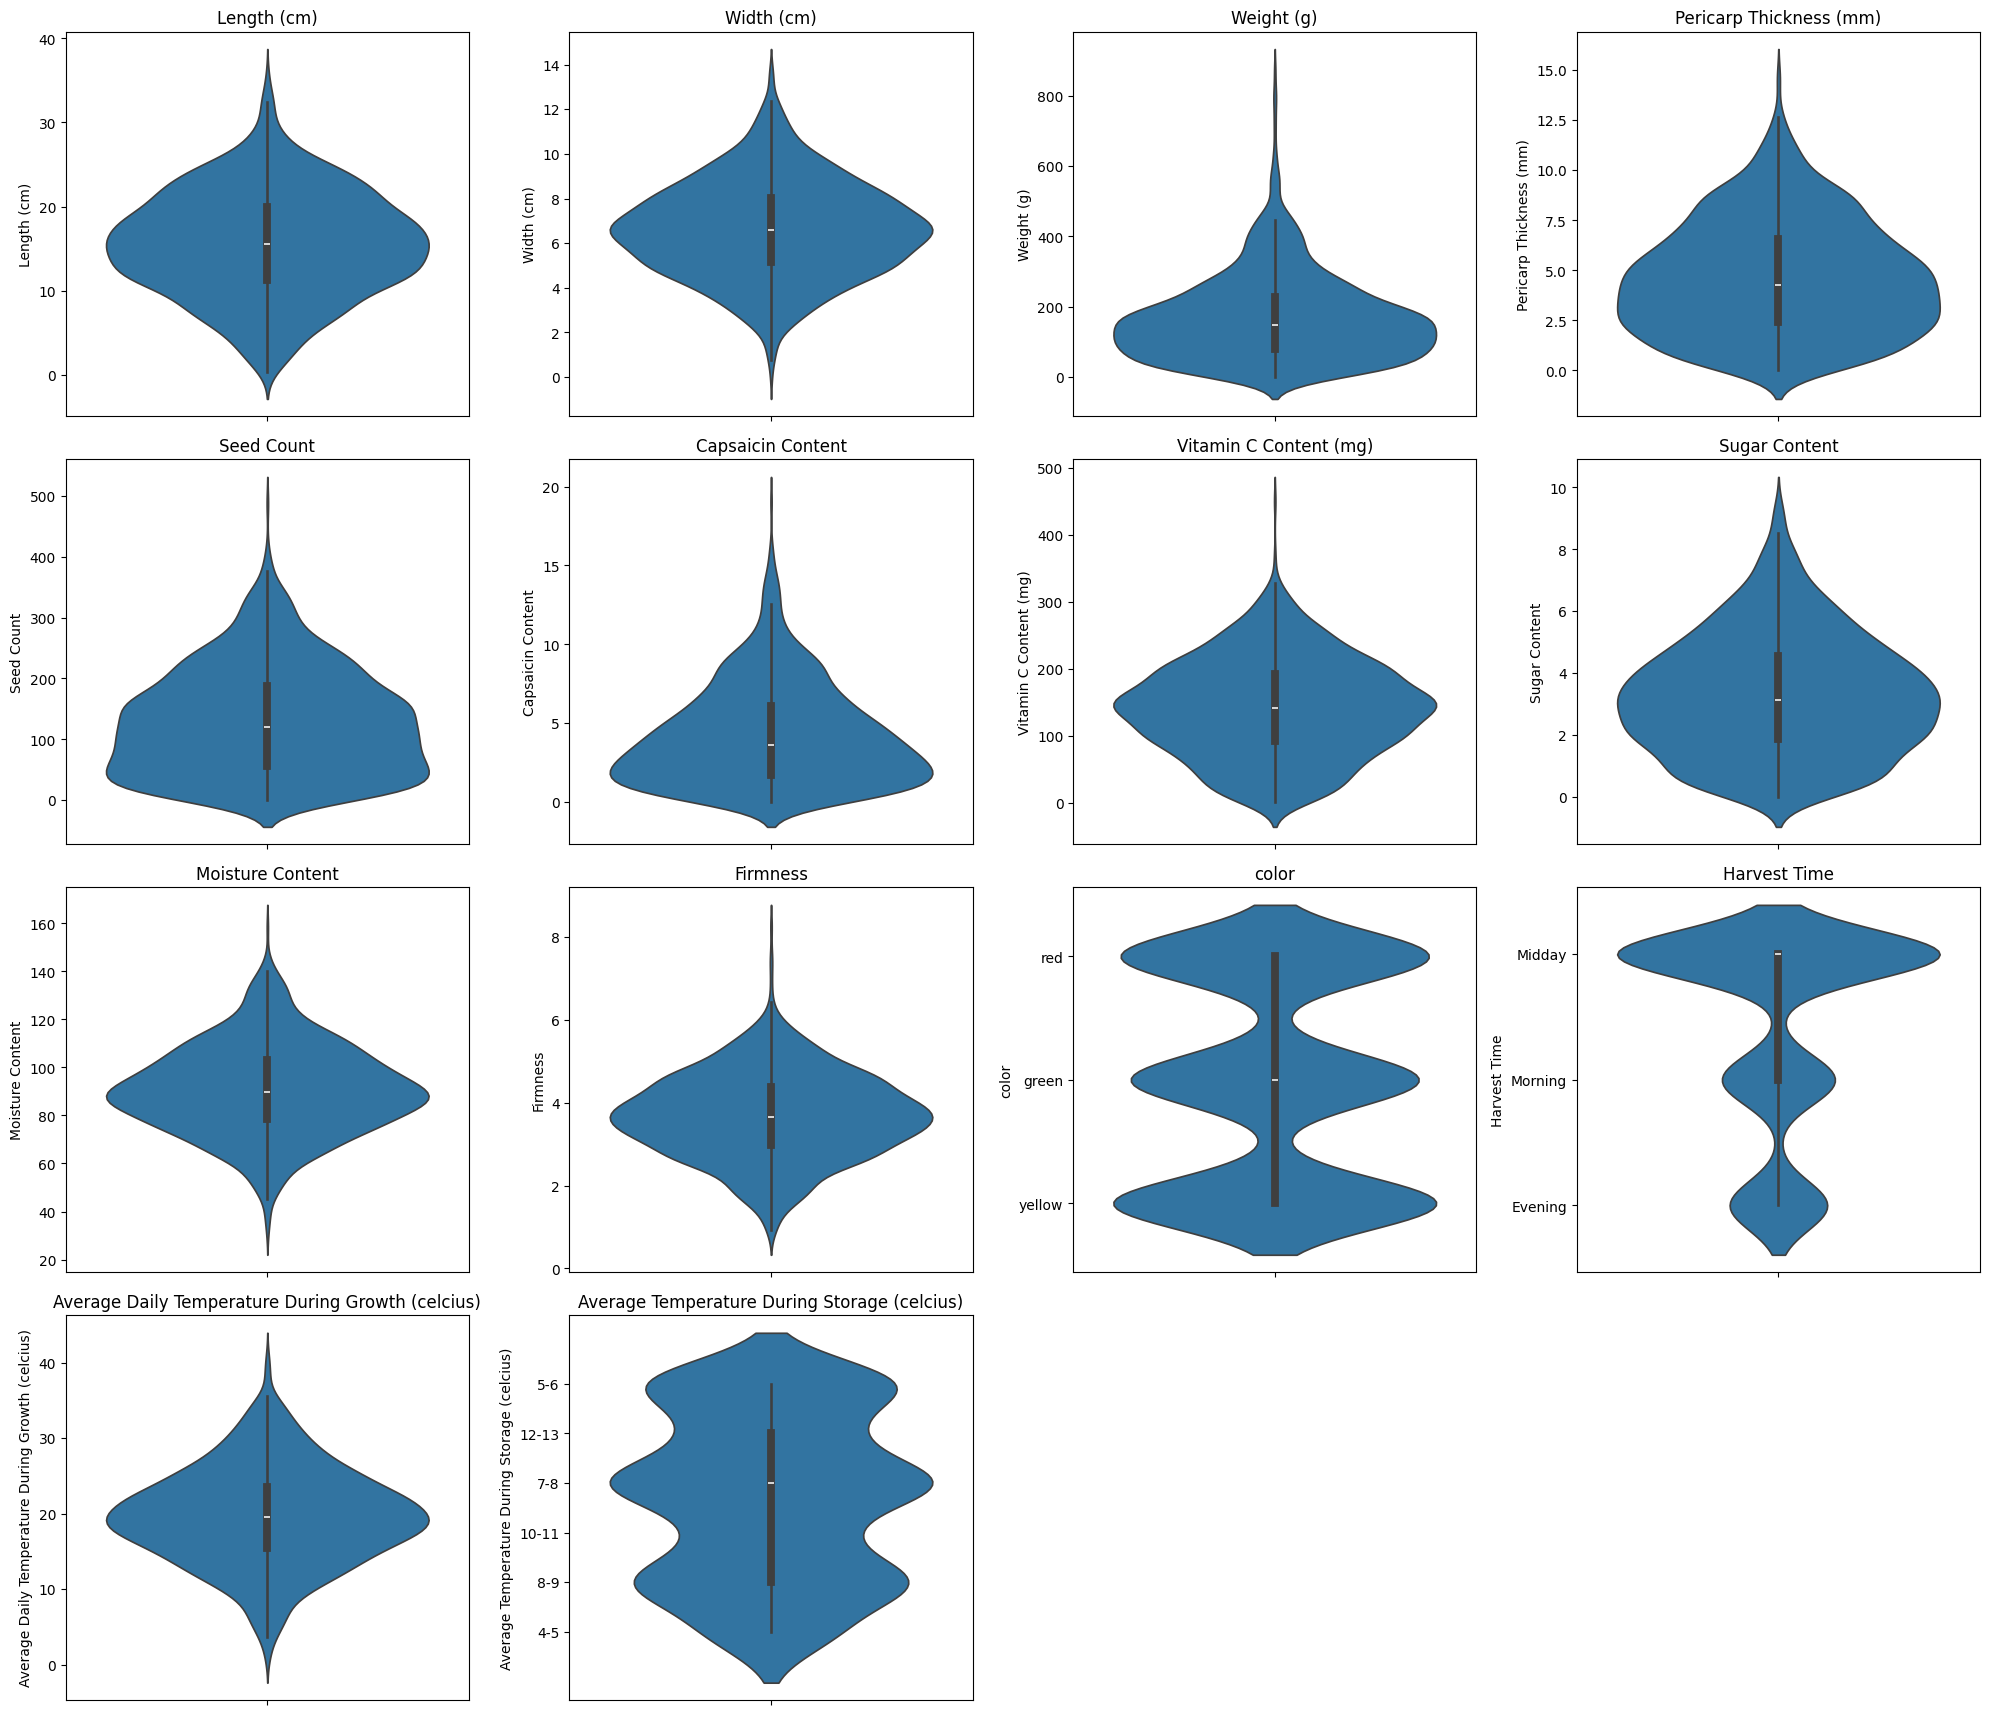

In [27]:
# Removing the target variable
# =============================
features = df_train.columns[:-1]

plt.figure(figsize=(20, 60))

for i, column in enumerate(features):
    plt.subplot(len(features), 4, i + 1)
    sns.violinplot(y=df_train[column])
    plt.title(column)

plt.tight_layout()
plt.show()

### Data cleaning

#### Handling Categorical Values

In [ ]:
df_train.columns

Index(['Length (cm)', 'Width (cm)', 'Weight (g)', 'Pericarp Thickness (mm)',
       'Seed Count', 'Capsaicin Content', 'Vitamin C Content (mg)',
       'Sugar Content', 'Moisture Content', 'Firmness', 'color',
       'Harvest Time', 'Average Daily Temperature During Growth (celcius)',
       'Average Temperature During Storage (celcius)',
       'Scoville Heat Units (SHU)'],
      dtype='object')

In [44]:
# Copying the dataset
# ===================
df_train_1 = df_train.copy()

In [53]:
#  Storing item of Categorical Columns
# =====================================
color = df_train_1['color'].unique()
harvest_time = df_train_1['Harvest Time'].unique()
avg_temp_storage = df_train_1['Average Temperature During Storage (celcius)'].unique()

In [60]:
avg_temp_storage

array(['5-6', nan, '12-13', '7-8', '10-11', '8-9', '4-5'], dtype=object)

In [61]:
# Removing nan from the array
# ====================================
avg_temp_storage = np.delete(avg_temp_storage, 1)

In [62]:
avg_temp_storage

array(['5-6', '12-13', '7-8', '10-11', '8-9', '4-5'], dtype=object)

In [63]:
# Taking average from the element of avg_temp_storage array and storing it in avg_temp_storage2 array
# ====================================================================================================
avg_temp_storage2 = []
for item in avg_temp_storage:
    item = item.split('-')
    item = [int(i) for i in item]
    avg = (item[0] + item[1]) / 2
    avg_temp_storage2.append(avg)

In [65]:
avg_temp_storage2

[5.5, 12.5, 7.5, 10.5, 8.5, 4.5]

In [66]:
# Creating dictionary from array
# ===============================
color_dict = dict(zip(color, range(len(color))))
harvest_time_dict = dict(zip(harvest_time, range(len(harvest_time))))
avg_temp_storage_dict = dict(zip(avg_temp_storage, avg_temp_storage2))

In [68]:
# Encoding the class label to integers
# ====================================
df_train_1['color'] = df_train_1['color'].map(color_dict)
df_train_1['Harvest Time'] = df_train_1['Harvest Time'].map(harvest_time_dict)
df_train_1['Average Temperature During Storage (celcius)'] = df_train_1['Average Temperature During Storage (celcius)'].map(avg_temp_storage_dict)

In [69]:
df_train_1.head(20)

,Length (cm),Width (cm),Weight (g),Pericarp Thickness (mm),Seed Count,Capsaicin Content,Vitamin C Content (mg),Sugar Content,Moisture Content,Firmness,color,Harvest Time,Average Daily Temperature During Growth (celcius),Average Temperature During Storage (celcius),Scoville Heat Units (SHU)
0,17.37,5.42,94.30,4.90,193.93,3.21,173.59,6.15,88.59,3.40,0,0,8.68,5.5,0.00
1,27.78,4.75,262.71,6.56,186.29,8.19,100.41,2.36,111.20,5.45,1,0,22.44,NaN,0.00
2,6.17,3.51,66.72,7.96,298.81,4.69,125.91,6.75,72.98,2.77,0,0,24.99,NaN,455995.06
3,6.12,6.07,51.24,4.57,39.36,2.76,143.54,5.93,63.93,1.62,2,0,13.05,NaN,0.00
4,28.58,4.84,166.51,3.07,194.07,7.01,193.76,2.85,88.19,3.99,0,0,27.08,NaN,0.00
5,13.80,8.64,189.24,4.32,72.27,2.38,140.15,4.60,117.75,3.21,2,1,24.95,NaN,0.00
6,9.15,8.40,74.69,1.70,8.45,6.22,68.89,4.02,101.63,5.54,2,0,31.34,NaN,70571.10
7,12.40,10.68,159.72,10.28,239.54,11.08,28.62,4.32,94.90,5.56,1,0,18.53,NaN,0.00
8,18.90,7.66,57.72,4.63,87.10,6.74,34.05,0.65,82.13,4.32,2,0,16.14,NaN,31362.49
9,35.57,8.82,633.31,6.92,244.27,0.84,312.63,0.84,84.36,2.63,0,1,21.27,NaN,0.00


In [71]:
# Filling missing values with SimpleImputer
# =========================================
imputer = SimpleImputer(strategy='mean')
df_train_1 = pd.DataFrame(imputer.fit_transform(df_train_1), columns=df_train_1.columns)

In [72]:
# Checking for missing data
# =========================
null_counts = df_train_1.isnull().sum().sum()
null_counts

0

In [73]:
df_train_1.head(20)

,Length (cm),Width (cm),Weight (g),Pericarp Thickness (mm),Seed Count,Capsaicin Content,Vitamin C Content (mg),Sugar Content,Moisture Content,Firmness,color,Harvest Time,Average Daily Temperature During Growth (celcius),Average Temperature During Storage (celcius),Scoville Heat Units (SHU)
0,17.37,5.42,94.30,4.90,193.93,3.21,173.59,6.15,88.59,3.40,0.0,0.0,8.68,5.500000,0.00
1,27.78,4.75,262.71,6.56,186.29,8.19,100.41,2.36,111.20,5.45,1.0,0.0,22.44,7.832386,0.00
2,6.17,3.51,66.72,7.96,298.81,4.69,125.91,6.75,72.98,2.77,0.0,0.0,24.99,7.832386,455995.06
3,6.12,6.07,51.24,4.57,39.36,2.76,143.54,5.93,63.93,1.62,2.0,0.0,13.05,7.832386,0.00
4,28.58,4.84,166.51,3.07,194.07,7.01,193.76,2.85,88.19,3.99,0.0,0.0,27.08,7.832386,0.00
5,13.80,8.64,189.24,4.32,72.27,2.38,140.15,4.60,117.75,3.21,2.0,1.0,24.95,7.832386,0.00
6,9.15,8.40,74.69,1.70,8.45,6.22,68.89,4.02,101.63,5.54,2.0,0.0,31.34,7.832386,70571.10
7,12.40,10.68,159.72,10.28,239.54,11.08,28.62,4.32,94.90,5.56,1.0,0.0,18.53,7.832386,0.00
8,18.90,7.66,57.72,4.63,87.10,6.74,34.05,0.65,82.13,4.32,2.0,0.0,16.14,7.832386,31362.49
9,35.57,8.82,633.31,6.92,244.27,0.84,312.63,0.84,84.36,2.63,0.0,1.0,21.27,7.832386,0.00


#### Handling Outliers

In [75]:
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Length (cm)                                        1000 non-null   float64
 1   Width (cm)                                         1000 non-null   float64
 2   Weight (g)                                         1000 non-null   float64
 3   Pericarp Thickness (mm)                            1000 non-null   float64
 4   Seed Count                                         1000 non-null   float64
 5   Capsaicin Content                                  1000 non-null   float64
 6   Vitamin C Content (mg)                             1000 non-null   float64
 7   Sugar Content                                      1000 non-null   float64
 8   Moisture Content                                   1000 non-null   float64
 9   Firmness 

In [76]:
# Detecting the outliers using the z-score (With the help of lecture note)
# =========================================================================
for column in df_train_1.columns:
    # Calculating the Z-scores for each column
    z_scores = (df_train_1[column] - df_train_1[column].mean()) / df_train_1[column].std()
    
    # Detecting outliers using the absolute value of the Z-scores (threshold of 2)
    outliers = (np.abs(z_scores) > 2)

    print(f"Number of outliers in {column}: {outliers.sum()}")

Number of outliers in Length (cm): 42
Number of outliers in Width (cm): 47
Number of outliers in Weight (g): 44
Number of outliers in Pericarp Thickness (mm): 30
Number of outliers in Seed Count: 38
Number of outliers in Capsaicin Content: 40
Number of outliers in Vitamin C Content (mg): 25
Number of outliers in Sugar Content: 35
Number of outliers in Moisture Content: 55
Number of outliers in Firmness: 40
Number of outliers in color: 1
Number of outliers in Harvest Time: 0
Number of outliers in Average Daily Temperature During Growth (celcius): 57
Number of outliers in Average Temperature During Storage (celcius): 73
Number of outliers in Scoville Heat Units (SHU): 64


In [77]:
# Removing the outliers from the dataset using Z-score method only for numerical data (With the help of lecture note)
# ===================================================================================================================
for column in df_train_1.columns:
    # Calculate the z-scores for each column
    z_scores = (df_train_1[column] - df_train_1[column].mean()) / df_train_1[column].std()
    
    # Only keep rows in dataframe where the z-score is less than 2 standard deviations
    df_train_2 = df_train_1[np.abs(z_scores) < 2]

# Checking the information of the dataset
df_train_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 0 to 998
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Length (cm)                                        936 non-null    float64
 1   Width (cm)                                         936 non-null    float64
 2   Weight (g)                                         936 non-null    float64
 3   Pericarp Thickness (mm)                            936 non-null    float64
 4   Seed Count                                         936 non-null    float64
 5   Capsaicin Content                                  936 non-null    float64
 6   Vitamin C Content (mg)                             936 non-null    float64
 7   Sugar Content                                      936 non-null    float64
 8   Moisture Content                                   936 non-null    float64
 9   Firmness       

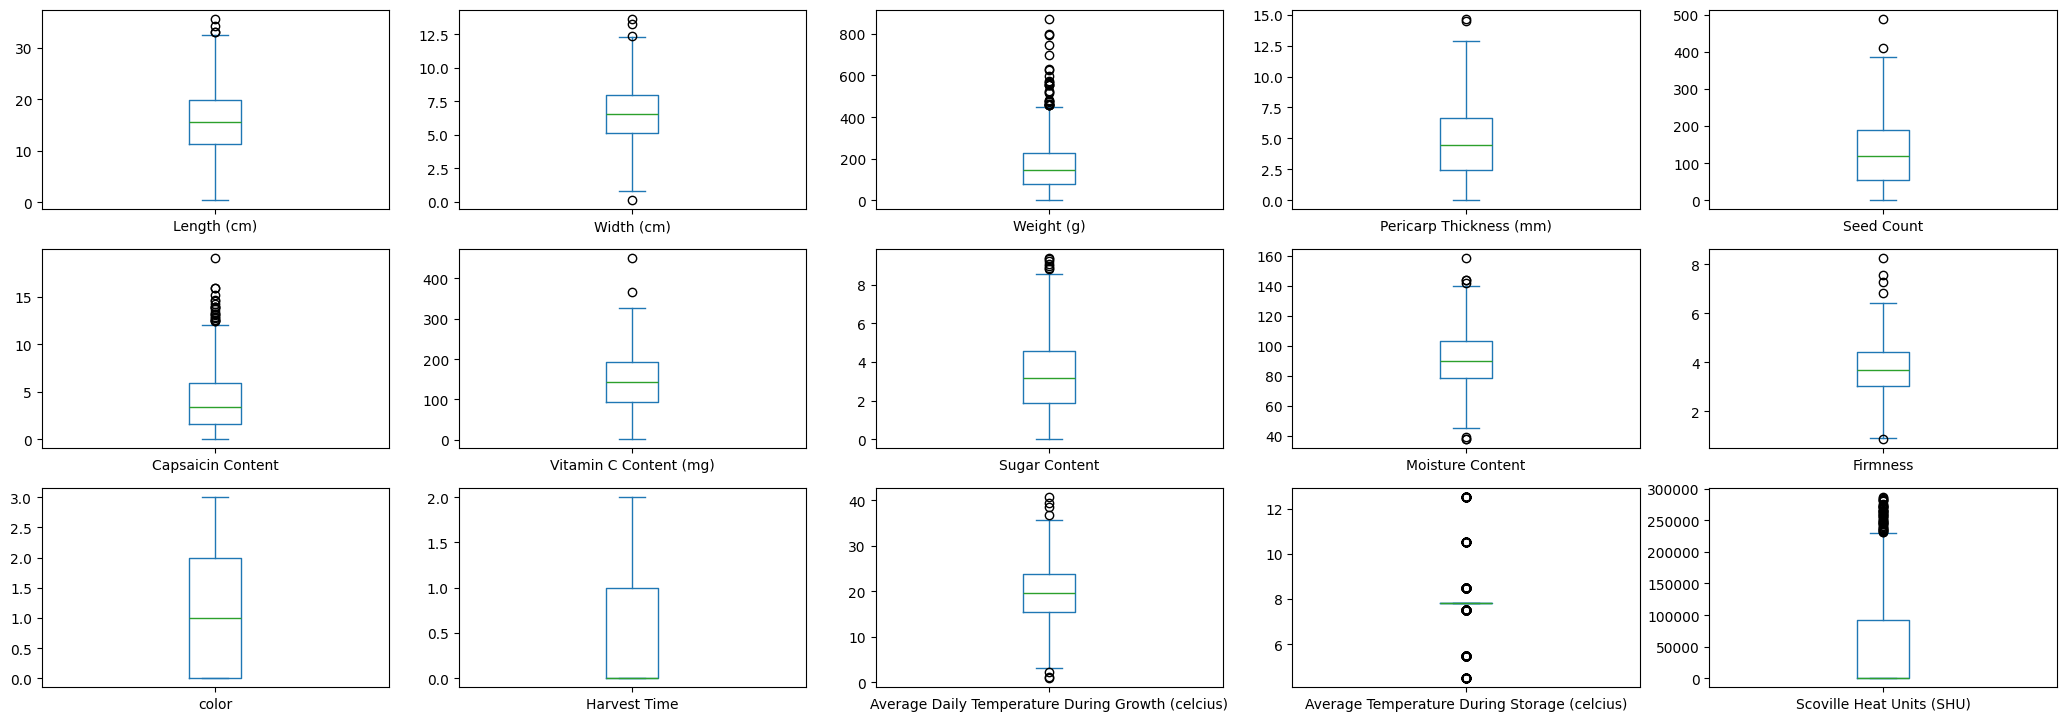

In [343]:
# Plotting the boxplot for the dataset
df_train_2.plot(kind='box', subplots=True, layout=(5,5), figsize=(26, 15))
plt.show()

##### It looks alsmost same as before as IQR uses different method to classify outliers

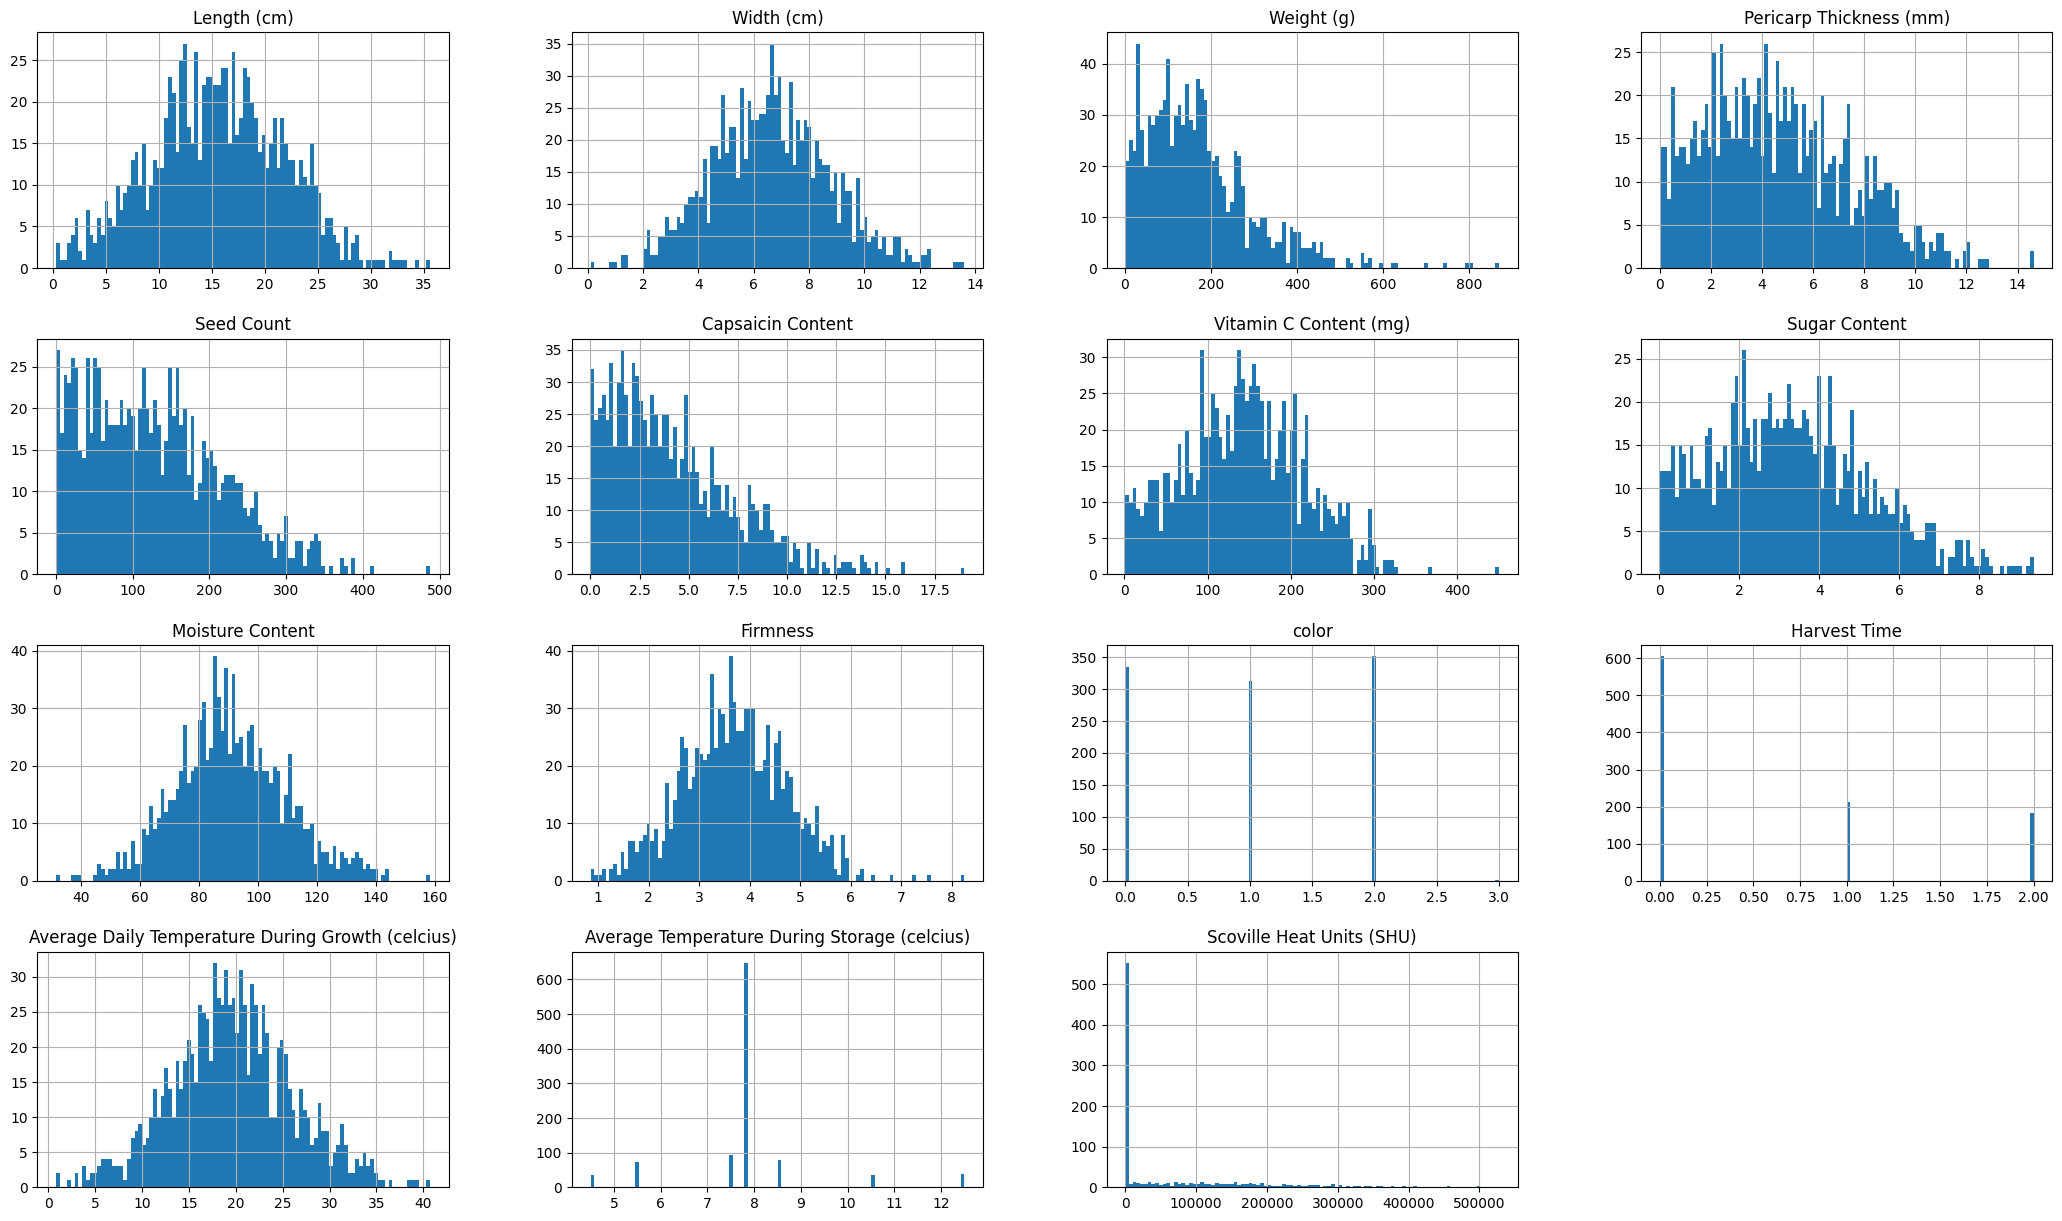

In [179]:
# Plotting the histogram for the dataset
df_train_1.hist(bins=100, figsize=(26, 15))
plt.show()

##### This show that dataset doesn't have significant outliers so we will just ignore it for this assignment.

### Data preprocessing and visualisation

#### Splitting the Dataset

In [226]:
#------------------------------------------------------------------------------------
# Spliting the cleaned dataset into test and train (This data will be used for later)
#------------------------------------------------------------------------------------
X = df_train.drop('Scoville Heat Units (SHU)', axis=1)
y = df_train['Scoville Heat Units (SHU)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Exploring training data after preprocessing

##### Here the data visualized is done on the different dataset which is actually used. In the modeling diffent approach has been used for transforing the 'Average Temperature During Storage (celcius)'.

In [227]:
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Length (cm)                                        1000 non-null   float64
 1   Width (cm)                                         1000 non-null   float64
 2   Weight (g)                                         1000 non-null   float64
 3   Pericarp Thickness (mm)                            1000 non-null   float64
 4   Seed Count                                         1000 non-null   float64
 5   Capsaicin Content                                  1000 non-null   float64
 6   Vitamin C Content (mg)                             1000 non-null   float64
 7   Sugar Content                                      1000 non-null   float64
 8   Moisture Content                                   1000 non-null   float64
 9   Firmness 

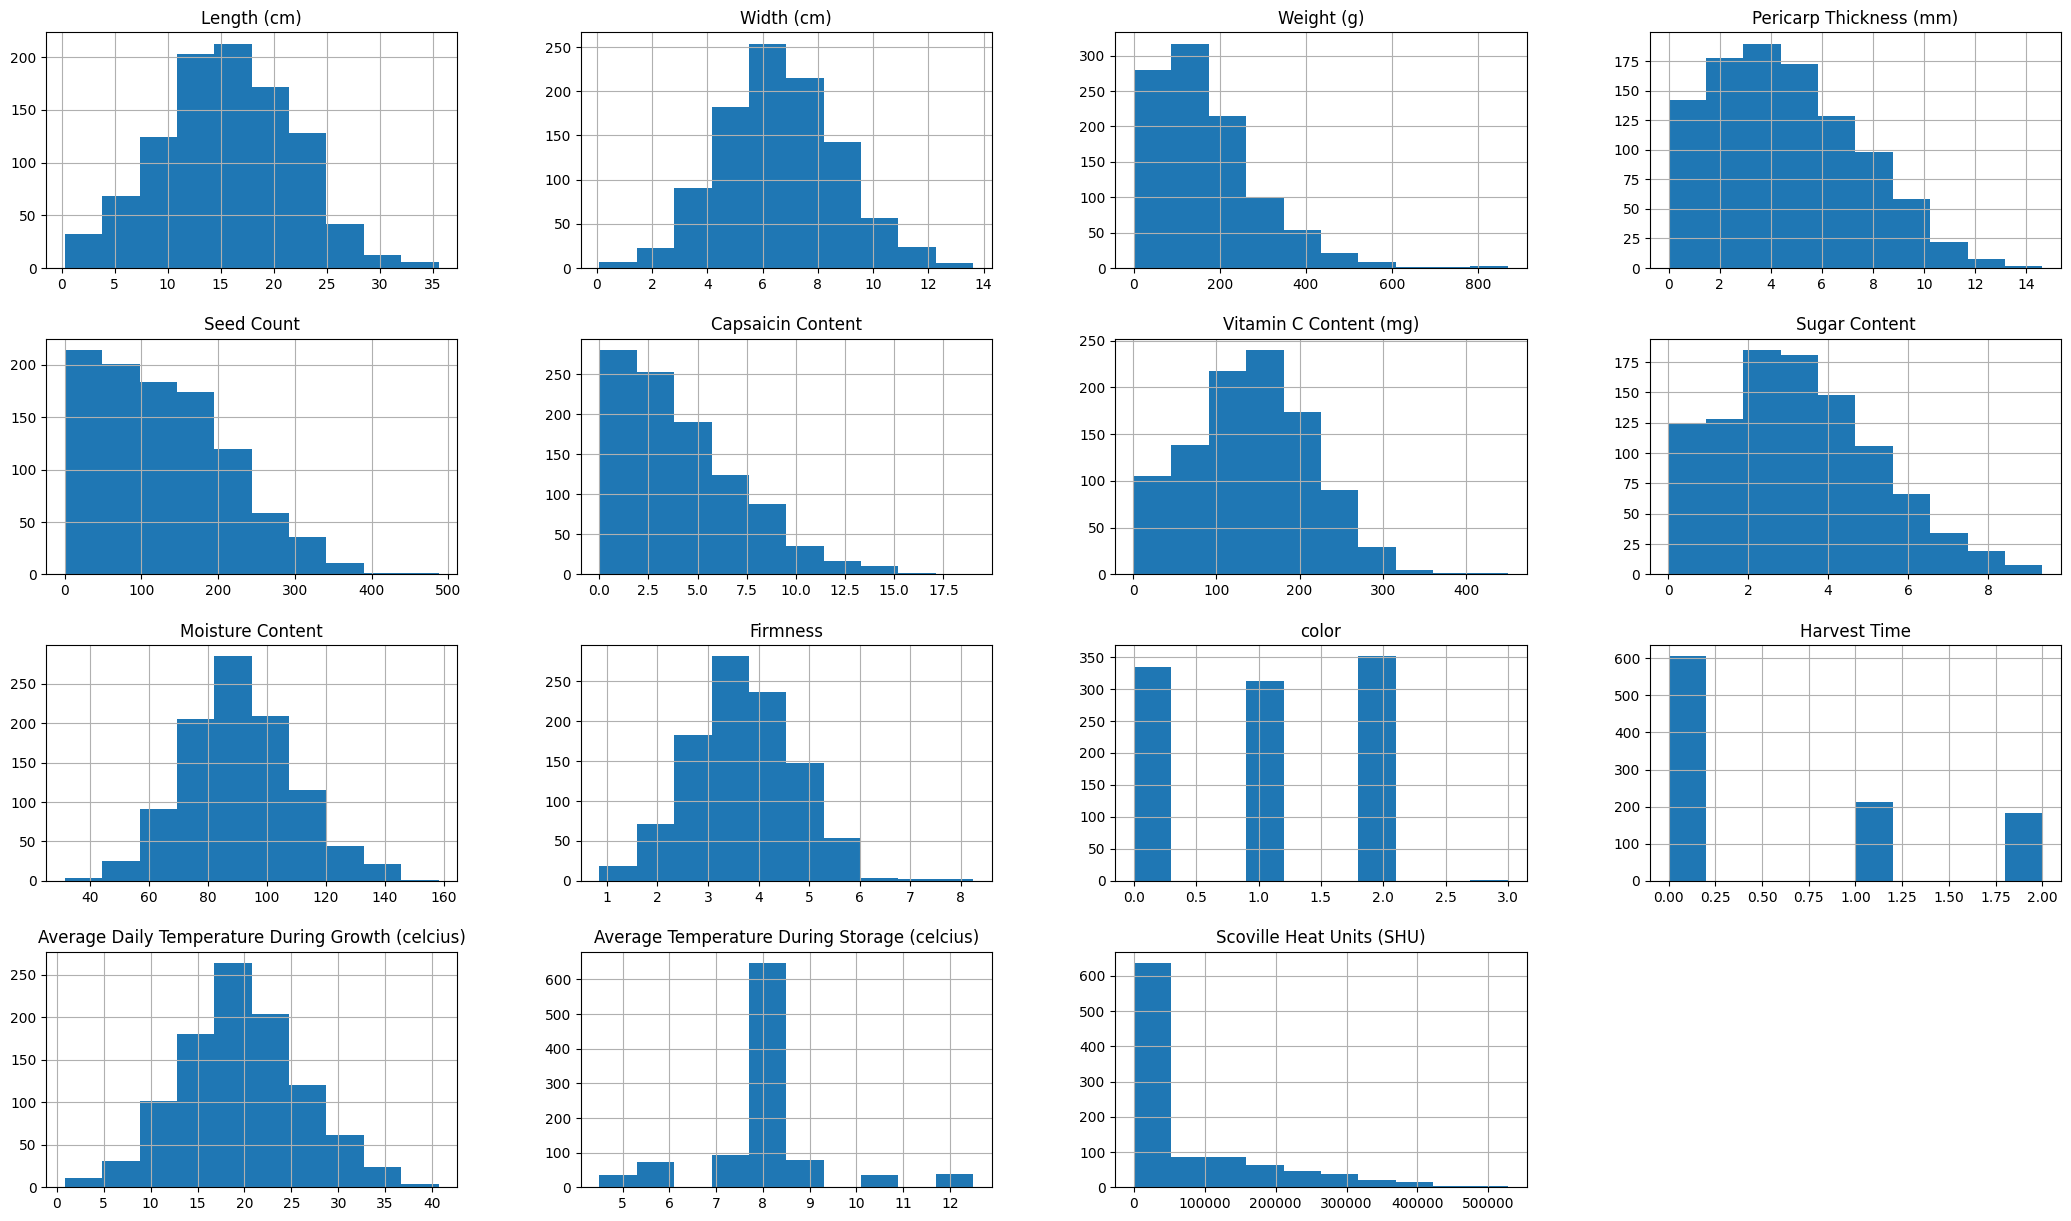

In [187]:
# Plotting histograms for all columns in the dataset
# ==================================================
df_train_1.hist(bins=10, figsize=(26, 15))
plt.show()

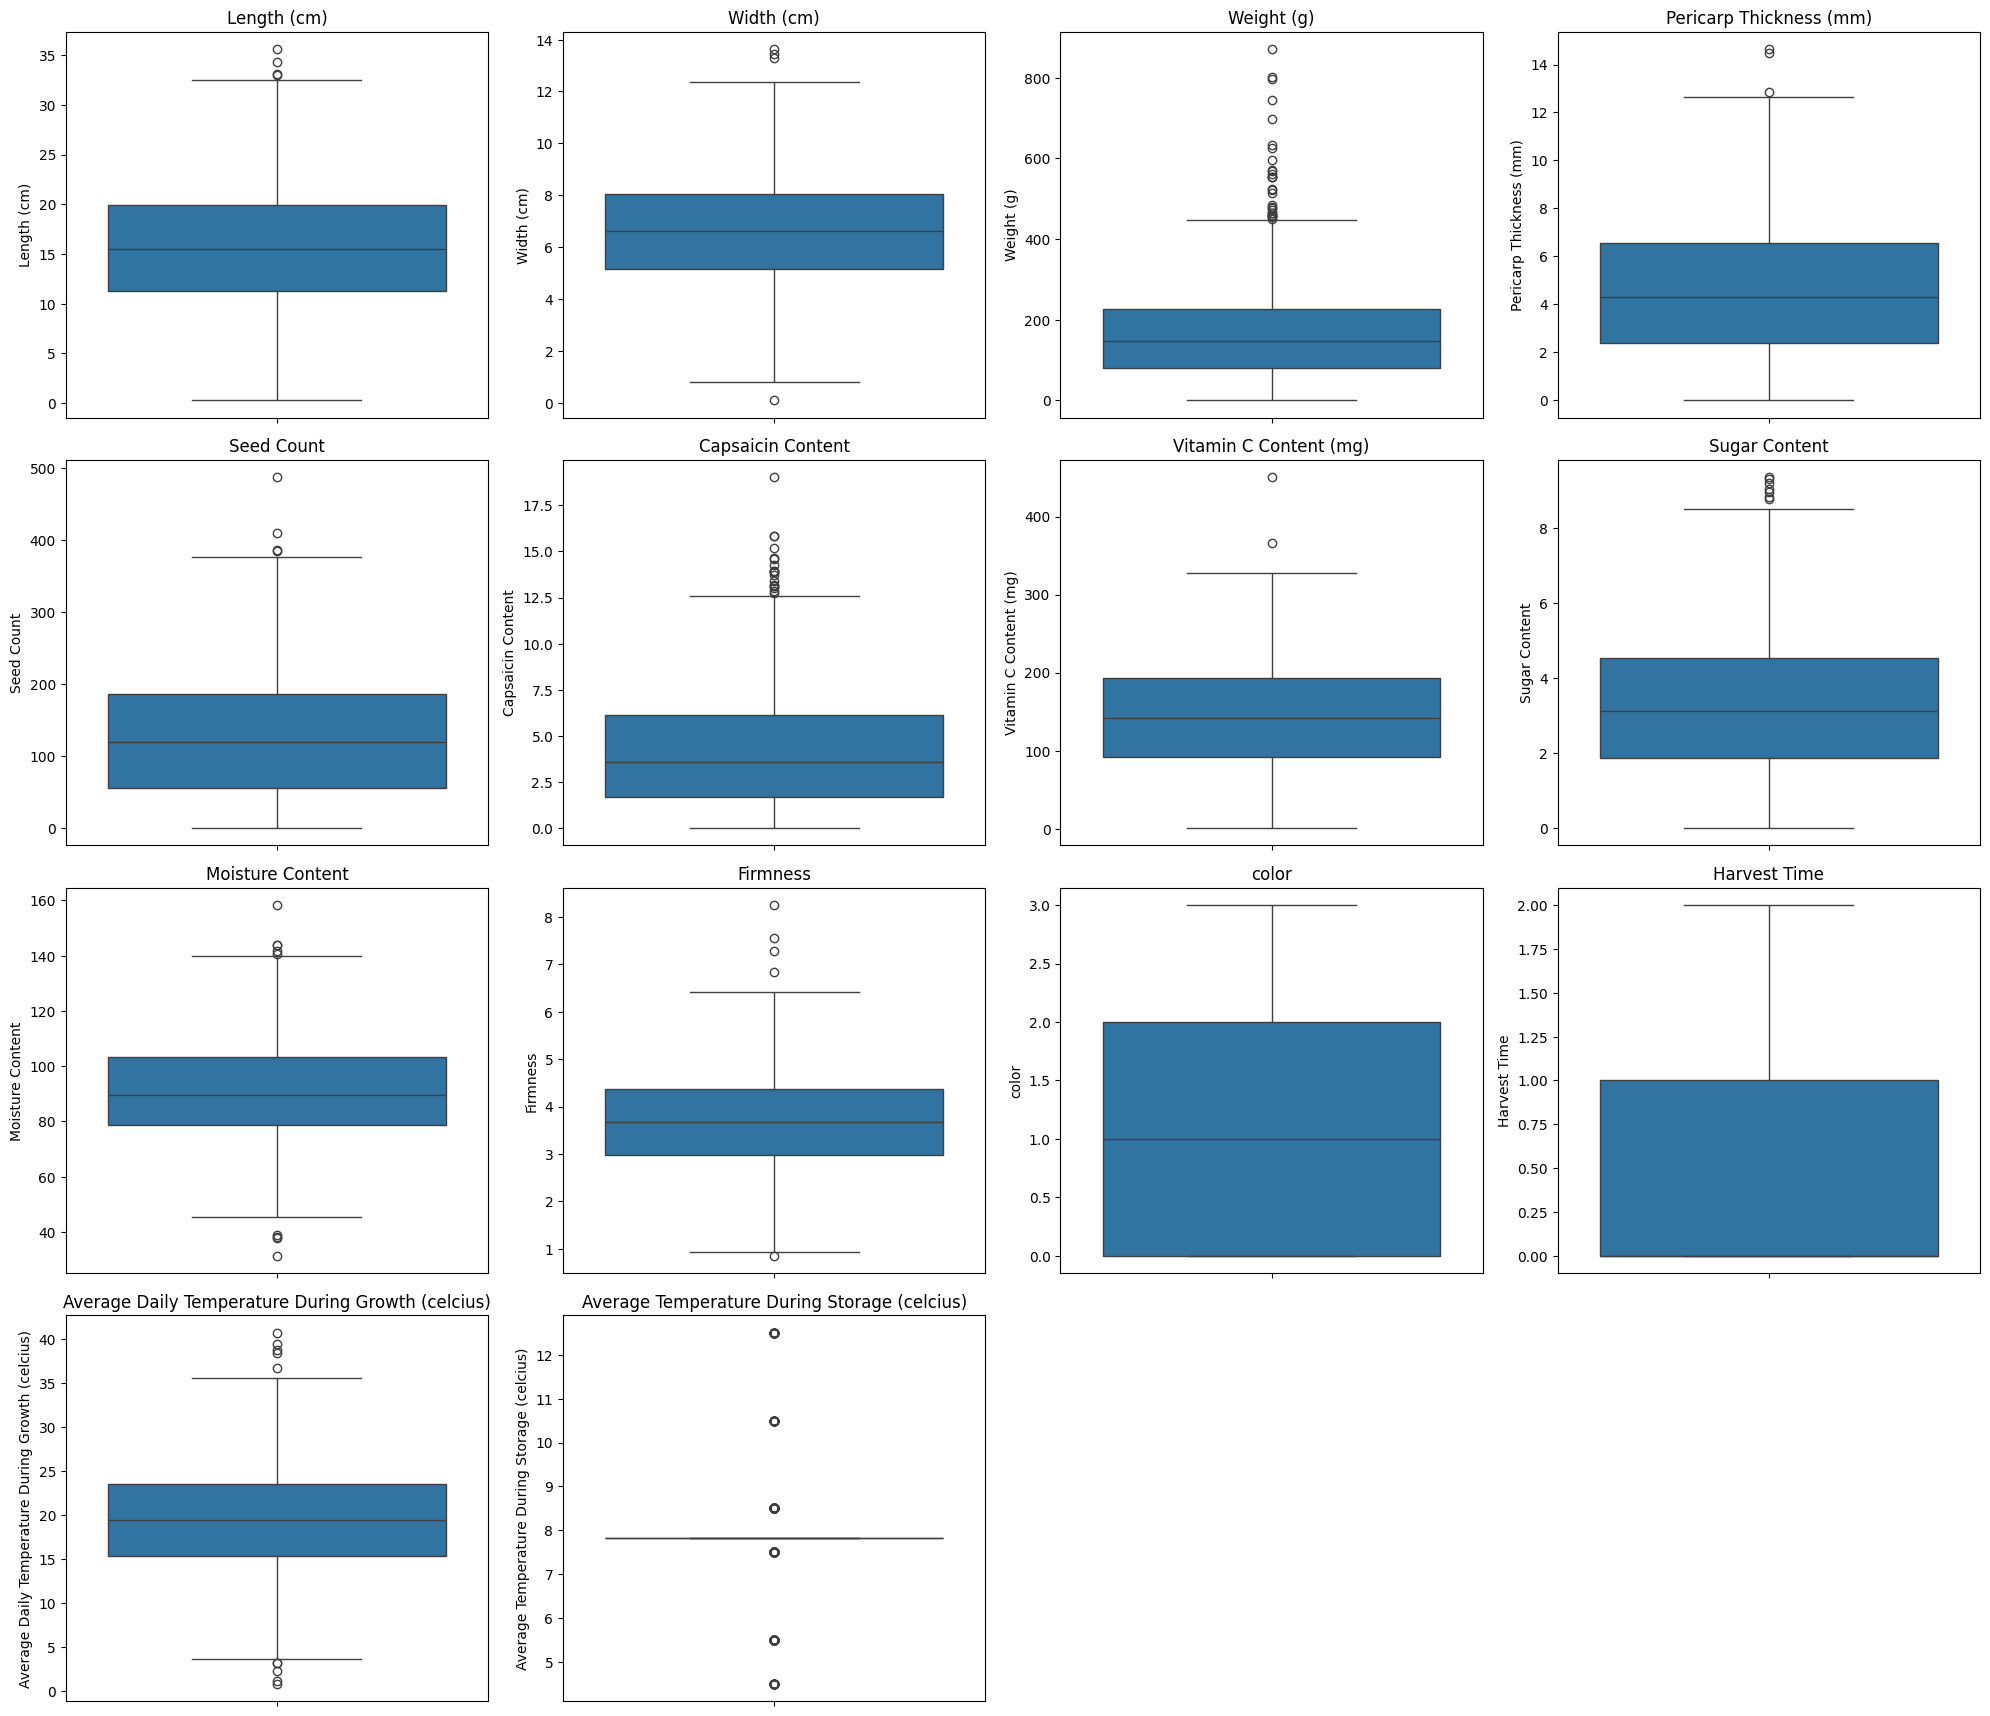

In [188]:
# Plotting the Boxplot for the cleaned dataset 
# ============================================
features = df_train_1.columns[:-1]

plt.figure(figsize=(20, 60))

for i, column in enumerate(features):
    plt.subplot(len(features), 4, i + 1)
    sns.boxplot(y=df_train_1[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

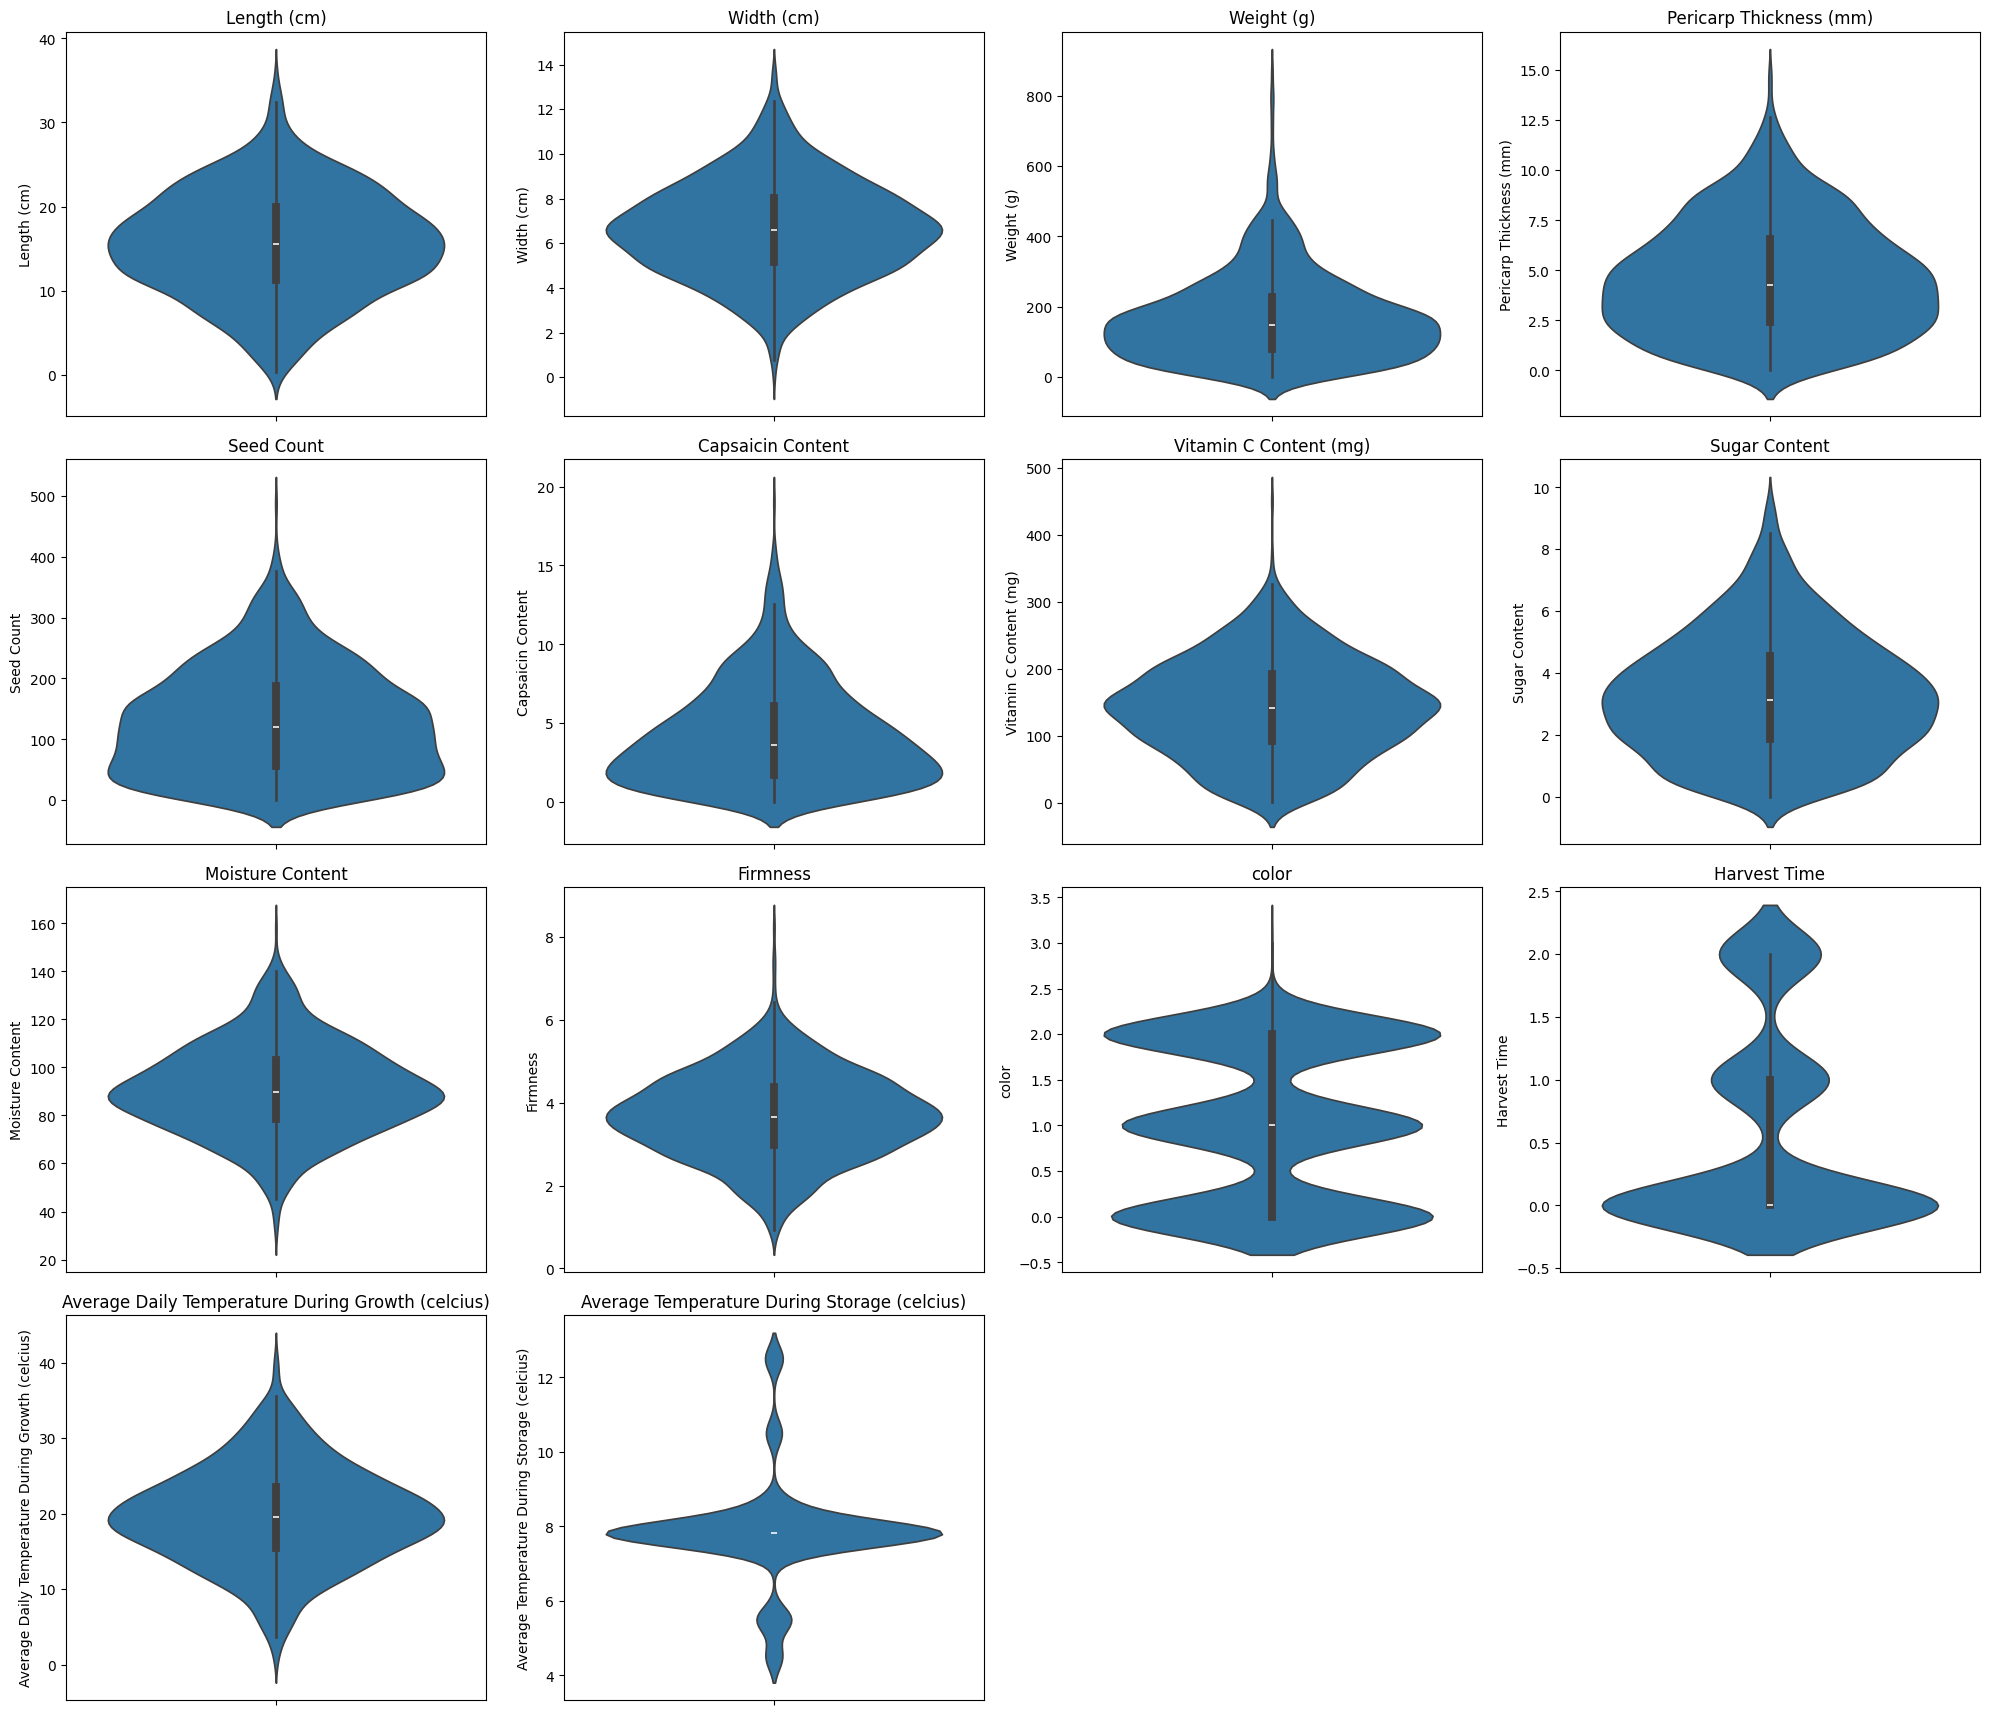

In [189]:
# Plotting the Violin plot for the cleaned dataset
# ================================================
features = df_train_1.columns[:-1]

plt.figure(figsize=(20, 60))

for i, column in enumerate(features):
    plt.subplot(len(features), 4, i + 1)
    sns.violinplot(y=df_train_1[column])
    plt.title(column)

plt.tight_layout()
plt.show()

### Modelling

#### Pipelining with Linear Regression

In [229]:
numeric_features = X.select_dtypes(include=[np.number]).columns

Index(['Length (cm)', 'Width (cm)', 'Weight (g)', 'Pericarp Thickness (mm)',
       'Seed Count', 'Capsaicin Content', 'Vitamin C Content (mg)',
       'Sugar Content', 'Moisture Content', 'Firmness',
       'Average Daily Temperature During Growth (celcius)'],
      dtype='object')

In [230]:
# Define the preprocessing step for numerical data (Taken From Lecture)
# ================================================
# Taking the name of the numerical features from the dataset
numeric_features = ['Length (cm)', 'Width (cm)', 'Weight (g)', 'Pericarp Thickness (mm)',
       'Seed Count', 'Capsaicin Content', 'Vitamin C Content (mg)',
       'Sugar Content', 'Moisture Content', 'Firmness',
       'Average Daily Temperature During Growth (celcius)']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scale_before', StandardScaler()),
    ('pca', PCA()), # e.g. name this step 'PCA' for later setting the parameter n_components
    ('scale_after', StandardScaler()),
])

# define the preprocessing step for ordinal categorical data
# ========================================================
# Taking the name of the ordinal features from the dataset
ordinal_features = ['color', 'Harvest Time']

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder()),
])

# define the preprocessing step for nominal categorical data
# ==========================================================
nominal_features = ['Average Temperature During Storage (celcius)']
nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False)),
])

# combine all the preprocessing steps for the different types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numeric_transformer, numeric_features),
        ('ordinal', ordinal_transformer, ordinal_features),
        ('nominal', nominal_transformer, nominal_features),
    ]
)

In [231]:
# Defining the pipeline that combines the preprocessing and Linear Regression model
# =================================================================================
pipe_lr2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearRegression()),
])

pipe_lr2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scale_before',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA()),
                                                                  ('scale_after',
                                                                   StandardScaler())]),
                                                  ['Length (cm)', 'Width (cm)',
                                                   'Weight (g)',
                                                   'Pericarp Thickness (mm)',
                                                   'Seed Count',
                                                   'Capsaicin Content',
                                                   'Vitamin C Content (mg)',
                                                   'Sugar Content',
                                                   'Moisture Content...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['color', 'Harvest Time']),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Average Temperature During '
                                                   'Storage (celcius)'])])),
                ('classifier', LinearRegression())])

In [232]:
# Defining the parameters for the pipeline
# ========================================
param_grid_lr2 = {
    'preprocessor__numerical__pca__n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [233]:
# Defining the GridSearchCV with Metric as Mean Absolute Error(MAE)
# =================================================================
grid_search_lr2 = GridSearchCV(pipe_lr2, param_grid_lr2, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

In [234]:
# Fitting the grid search
# =======================
grid_search_lr2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scale_before',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA()),
                                                                                         ('scale_after',
                                                                                          StandardScaler())]),
                                                                         ['Length '
                                                                          '(cm)',
                                                                          'Width '
                                                                          '(cm)',
                                                                          'Weight '
                                                                          '(g)',
                                                                          'Pericarp '
                                                                          'Thickness '
                                                                          '(mm)',
                                                                          'Seed '
                                                                          'Count',
                                                                          'Capsaicin '
                                                                          'Content',
                                                                          'Vitamin '
                                                                          'C...
                                                                        ('nominal',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse_output=False))]),
                                                                         ['Average '
                                                                          'Temperature '
                                                                          'During '
                                                                          'Storage '
                                                                          '(celcius)'])])),
                                       ('classifier', LinearRegression())]),
             n_jobs=-1,
             param_grid={'preprocessor__numerical__pca__n_components': [2, 3, 4,
                                                                        5, 6, 7,
                                                                        8, 9,
                                                                        10]},
             scoring='neg_mean_absolute_error')

In [235]:
# Printing the best parameters
# =============================
print(f"Best parameters: {grid_search_lr2.best_params_}")

# Printing the best score
# ========================
print(f"Best score: {grid_search_lr2.best_score_}")

Best parameters: {'preprocessor__numerical__pca__n_components': 10}
Best score: -69778.63601863822


#### Pipelining with Random Forest Regresssor

In [236]:
# Defining the pipeline combining the preprocessing and Random Forest Regressor model
# ===================================================================================
pipe_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestRegressor(random_state=42)),
])

pipe_rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scale_before',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA()),
                                                                  ('scale_after',
                                                                   StandardScaler())]),
                                                  ['Length (cm)', 'Width (cm)',
                                                   'Weight (g)',
                                                   'Pericarp Thickness (mm)',
                                                   'Seed Count',
                                                   'Capsaicin Content',
                                                   'Vitamin C Content (mg)',
                                                   'Sugar Content',
                                                   'Moisture Content...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['color', 'Harvest Time']),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Average Temperature During '
                                                   'Storage (celcius)'])])),
                ('classifier', RandomForestRegressor(random_state=42))])

In [237]:
# Defining the parameters for the pipeline
# ========================================
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30, 40, 50],
    'preprocessor__numerical__pca__n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [239]:
# Defining the GridSearchCV with Metric as Mean Absolute Error(MAE)
# =================================================================
grid_search_rfr = GridSearchCV(pipe_rf, param_grid_rf, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

In [240]:
# Fitting the grid search
# =======================
grid_search_rfr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scale_before',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA()),
                                                                                         ('scale_after',
                                                                                          StandardScaler())]),
                                                                         ['Length '
                                                                          '(cm)',
                                                                          'Width '
                                                                          '(cm)',
                                                                          'Weight '
                                                                          '(g)',
                                                                          'Pericarp '
                                                                          'Thickness '
                                                                          '(mm)',
                                                                          'Seed '
                                                                          'Count',
                                                                          'Capsaicin '
                                                                          'Content',
                                                                          'Vitamin '
                                                                          'C...
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse_output=False))]),
                                                                         ['Average '
                                                                          'Temperature '
                                                                          'During '
                                                                          'Storage '
                                                                          '(celcius)'])])),
                                       ('classifier',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [10, 20, 30, 40, 50],
                         'classifier__n_estimators': [100, 200, 300],
                         'preprocessor__numerical__pca__n_components': [2, 3, 4,
                                                                        5, 6, 7,
                                                                        8, 9,
                                                                        10]},
             scoring='neg_mean_absolute_error')

In [242]:
# Printing the best parameters
# =============================
print(f"Best parameters: {grid_search_rfr.best_params_}")

# Printing the best score
# ========================
print(f"Best score: {grid_search_rfr.best_score_}")

Best parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 300, 'preprocessor__numerical__pca__n_components': 5}
Best score: -65417.52185921394


#### Pipelining with Ensemble Classification (Random Forest Classifier)

In [254]:
# Binning the y_train into 10 bins
# ================================
n_bins = 10
y_train_binned, bin_edges = pd.cut(y_train, n_bins, labels=False, retbins=True)

In [256]:
# Defining the pipeline combining the preprocessing and Random Forest Classifier model
# =====================================================================================
pipe_rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42)),
])

pipe_rfc

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scale_before',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA()),
                                                                  ('scale_after',
                                                                   StandardScaler())]),
                                                  ['Length (cm)', 'Width (cm)',
                                                   'Weight (g)',
                                                   'Pericarp Thickness (mm)',
                                                   'Seed Count',
                                                   'Capsaicin Content',
                                                   'Vitamin C Content (mg)',
                                                   'Sugar Content',
                                                   'Moisture Content...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['color', 'Harvest Time']),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Average Temperature During '
                                                   'Storage (celcius)'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [257]:
# Defining the parameters for the pipeline
# ========================================
param_grid_rfc = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30, 40, 50],
    'preprocessor__numerical__pca__n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [258]:
# Calculating midpoints from bin edges (Main Idea got from stackoverflow)
# =======================================================================
bin_midpoints = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges)-1)]

def custom_scorer(y_true, y_pred):
    # Mapping the predicted labels to continuous values
    y_pred_continuous = np.array([bin_midpoints[label] for label in y_pred])
    return mean_absolute_error(y_true, y_pred_continuous)

# Creating scorer with make_scorer
# ================================
custom_mae_scorer = make_scorer(custom_scorer, greater_is_better=False)

In [321]:
# Defining the GridSearchCV with MAE as the metric
# ================================================
grid_search_rfc = GridSearchCV(pipe_rfc, param_grid_rfc, cv=5, scoring=custom_mae_scorer, n_jobs=-1)


In [322]:
# Fitting the grid search
# =======================
grid_search_rfc.fit(X_train, y_train_binned)

/Users/jony/opt/anaconda3/envs/dat200_env/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scale_before',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA()),
                                                                                         ('scale_after',
                                                                                          StandardScaler())]),
                                                                         ['Length '
                                                                          '(cm)',
                                                                          'Width '
                                                                          '(cm)',
                                                                          'Weight '
                                                                          '(g)',
                                                                          'Pericarp '
                                                                          'Thickness '
                                                                          '(mm)',
                                                                          'Seed '
                                                                          'Count',
                                                                          'Capsaicin '
                                                                          'Content',
                                                                          'Vitamin '
                                                                          'C...
                                                                          'Temperature '
                                                                          'During '
                                                                          'Storage '
                                                                          '(celcius)'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [10, 20, 30, 40, 50],
                         'classifier__n_estimators': [100, 200, 300],
                         'preprocessor__numerical__pca__n_components': [2, 3, 4,
                                                                        5, 6, 7,
                                                                        8, 9,
                                                                        10]},
             scoring=make_scorer(custom_scorer, greater_is_better=False, response_method='predict'))

In [323]:
# Printing the best parameters
# =============================
print(f"Best parameters: {grid_search_rfc.best_params_}")

# Printing the best score
# ========================
print(f"Best score: {grid_search_rfc.best_score_}")

Best parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 100, 'preprocessor__numerical__pca__n_components': 8}
Best score: -29290.795577899997


In [346]:
# Looping through the different values of n_bins
# =============================================
for n_bins in range(5, 10):
    # Binning the y_train into n_bins
    y_train_binned, bin_edges = pd.cut(y_train, n_bins, labels=False, retbins=True)
    
    # Calculating midpoints from bin edges
    bin_midpoints = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges)-1)]
    
    # Defining the GridSearchCV with MAE as the metric
    grid_search_rfc = GridSearchCV(pipe_rfc, param_grid_rfc, cv=5, scoring=custom_mae_scorer, n_jobs=-1)
    
    # Fitting the grid search
    grid_search_rfc.fit(X_train, y_train_binned)
    
    # Printing the best parameters
    print(f"Best parameters for {n_bins} bins: {grid_search_rfc.best_params_}")
    
    # Printing the best score
    print(f"Best score for {n_bins} bins: {grid_search_rfc.best_score_}")

Best parameters for 5 bins: {'classifier__max_depth': 10, 'classifier__n_estimators': 100, 'preprocessor__numerical__pca__n_components': 8}
Best score for 5 bins: -57127.758442025006
Best parameters for 6 bins: {'classifier__max_depth': 10, 'classifier__n_estimators': 300, 'preprocessor__numerical__pca__n_components': 8}
Best score for 6 bins: -49438.154382291665
Best parameters for 7 bins: {'classifier__max_depth': 10, 'classifier__n_estimators': 300, 'preprocessor__numerical__pca__n_components': 10}
Best score for 7 bins: -40825.870274517845
Best parameters for 8 bins: {'classifier__max_depth': 10, 'classifier__n_estimators': 100, 'preprocessor__numerical__pca__n_components': 8}
Best score for 8 bins: -35689.0224053125
Best parameters for 9 bins: {'classifier__max_depth': 10, 'classifier__n_estimators': 200, 'preprocessor__numerical__pca__n_components': 8}
Best score for 9 bins: -31841.19990123333


##### Here we can see that with the increasing number of bins are having good effect on score. This is because more number of bins creates better detailed categorization while binning. So, it reduce the error by capturing the variance of the data.

#### A two-step analysis (two sequential pipelines)

#### First step, training an ensemble classification model to separate bell peppers

In [277]:
# Creating a column with peppers with a SHU of 0 as 0 and SHU larger than 0 as 1
# ==============================================================================
df_train_3 = df_train.copy()
df_train_3['Spiciness'] = df_train_3['Scoville Heat Units (SHU)'].apply(lambda x: 0 if x == 0 else 1)

In [278]:
df_train_3.head(20)

,Length (cm),Width (cm),Weight (g),Pericarp Thickness (mm),Seed Count,Capsaicin Content,Vitamin C Content (mg),Sugar Content,Moisture Content,Firmness,color,Harvest Time,Average Daily Temperature During Growth (celcius),Average Temperature During Storage (celcius),Scoville Heat Units (SHU),Spiciness
0,17.37,5.42,94.30,4.90,193.93,3.21,173.59,6.15,88.59,3.40,red,Midday,8.68,5-6,0.00,0
1,27.78,4.75,262.71,6.56,186.29,8.19,100.41,2.36,111.20,5.45,green,Midday,22.44,NaN,0.00,0
2,6.17,3.51,66.72,7.96,298.81,4.69,125.91,6.75,72.98,2.77,red,Midday,24.99,NaN,455995.06,1
3,6.12,6.07,51.24,4.57,39.36,2.76,143.54,5.93,63.93,1.62,yellow,Midday,13.05,NaN,0.00,0
4,28.58,4.84,166.51,3.07,194.07,7.01,193.76,2.85,88.19,3.99,red,Midday,27.08,NaN,0.00,0
5,13.80,8.64,189.24,4.32,72.27,2.38,140.15,4.60,117.75,3.21,yellow,Morning,24.95,NaN,0.00,0
6,9.15,8.40,74.69,1.70,8.45,6.22,68.89,4.02,101.63,5.54,yellow,Midday,31.34,NaN,70571.10,1
7,12.40,10.68,159.72,10.28,239.54,11.08,28.62,4.32,94.90,5.56,green,Midday,18.53,NaN,0.00,0
8,18.90,7.66,57.72,4.63,87.10,6.74,34.05,0.65,82.13,4.32,yellow,Midday,16.14,NaN,31362.49,1
9,35.57,8.82,633.31,6.92,244.27,0.84,312.63,0.84,84.36,2.63,red,Morning,21.27,NaN,0.00,0


In [281]:
# Splitting the dataset into test and train
# =========================================
X_cleaned2 = df_train_3.drop(['Scoville Heat Units (SHU)', 'Spiciness'], axis=1)
y_cleaned2 = df_train_3['Spiciness']

X_train_cleaned2, X_test_cleaned2, y_train_cleaned2, y_test_cleaned2 = train_test_split(X_cleaned2, y_cleaned2, test_size=0.2, random_state=42)

In [282]:
# Fitting the new train data to the ensemble model created above
# =============================================================
grid_search_rfc.fit(X_train_cleaned2, y_train_cleaned2)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scale_before',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA()),
                                                                                         ('scale_after',
                                                                                          StandardScaler())]),
                                                                         ['Length '
                                                                          '(cm)',
                                                                          'Width '
                                                                          '(cm)',
                                                                          'Weight '
                                                                          '(g)',
                                                                          'Pericarp '
                                                                          'Thickness '
                                                                          '(mm)',
                                                                          'Seed '
                                                                          'Count',
                                                                          'Capsaicin '
                                                                          'Content',
                                                                          'Vitamin '
                                                                          'C...
                                                                          'Temperature '
                                                                          'During '
                                                                          'Storage '
                                                                          '(celcius)'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [10, 20, 30, 40, 50],
                         'classifier__n_estimators': [100, 200, 300],
                         'preprocessor__numerical__pca__n_components': [2, 3, 4,
                                                                        5, 6, 7,
                                                                        8, 9,
                                                                        10]},
             scoring=make_scorer(custom_scorer, greater_is_better=False, response_method='predict'))

In [283]:
# Printing the best parameters
# =============================
print(f"Best parameters: {grid_search_rfc.best_params_}")

# Printing the best score
# ========================
print(f"Best score: {grid_search_rfc.best_score_}")

Best parameters: {'classifier__max_depth': 30, 'classifier__n_estimators': 200, 'preprocessor__numerical__pca__n_components': 7}
Best score: -49317.375664374995


In [284]:
# Predicting the test data
# ========================
y_pred_ensemble = grid_search_rfc.predict(X_test_cleaned2)

In [285]:
y_pred_ensemble

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1])

In [286]:
y_pred_ensemble.shape

(200,)

#### Second step, using a regression model to estimate the scoville score (SHU) of those samples that the binary classifier identifies as spicy peppers.

In [291]:
# Testing the classifier model on full dataset
# ============================================
df_train_4 = df_train_3.copy()
df_train_4['Spiciness'] = grid_search_rfc.predict(X_cleaned2)

In [292]:
df_train_4.head(20)

,Length (cm),Width (cm),Weight (g),Pericarp Thickness (mm),Seed Count,Capsaicin Content,Vitamin C Content (mg),Sugar Content,Moisture Content,Firmness,color,Harvest Time,Average Daily Temperature During Growth (celcius),Average Temperature During Storage (celcius),Scoville Heat Units (SHU),Spiciness
0,17.37,5.42,94.30,4.90,193.93,3.21,173.59,6.15,88.59,3.40,red,Midday,8.68,5-6,0.00,0
1,27.78,4.75,262.71,6.56,186.29,8.19,100.41,2.36,111.20,5.45,green,Midday,22.44,NaN,0.00,0
2,6.17,3.51,66.72,7.96,298.81,4.69,125.91,6.75,72.98,2.77,red,Midday,24.99,NaN,455995.06,1
3,6.12,6.07,51.24,4.57,39.36,2.76,143.54,5.93,63.93,1.62,yellow,Midday,13.05,NaN,0.00,0
4,28.58,4.84,166.51,3.07,194.07,7.01,193.76,2.85,88.19,3.99,red,Midday,27.08,NaN,0.00,0
5,13.80,8.64,189.24,4.32,72.27,2.38,140.15,4.60,117.75,3.21,yellow,Morning,24.95,NaN,0.00,0
6,9.15,8.40,74.69,1.70,8.45,6.22,68.89,4.02,101.63,5.54,yellow,Midday,31.34,NaN,70571.10,1
7,12.40,10.68,159.72,10.28,239.54,11.08,28.62,4.32,94.90,5.56,green,Midday,18.53,NaN,0.00,0
8,18.90,7.66,57.72,4.63,87.10,6.74,34.05,0.65,82.13,4.32,yellow,Midday,16.14,NaN,31362.49,1
9,35.57,8.82,633.31,6.92,244.27,0.84,312.63,0.84,84.36,2.63,red,Morning,21.27,NaN,0.00,0


In [293]:
# Making a dataset with row where 'Spciness (Prediction)' is  1
# ============================================================
df_train_s = df_train_4[df_train_4['Spiciness'] == 1]

In [294]:
# Splitting the dataset into test and train
# =========================================
X_s = df_train_s.drop(['Scoville Heat Units (SHU)', 'Spiciness'], axis=1)
y_s = df_train_s['Scoville Heat Units (SHU)']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.2, random_state=42)

In [295]:
# Fitting the new train data to the Random Forest Regressor model created above
# =============================================================================
grid_search_rfr.fit(X_train_s, y_train_s)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scale_before',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA()),
                                                                                         ('scale_after',
                                                                                          StandardScaler())]),
                                                                         ['Length '
                                                                          '(cm)',
                                                                          'Width '
                                                                          '(cm)',
                                                                          'Weight '
                                                                          '(g)',
                                                                          'Pericarp '
                                                                          'Thickness '
                                                                          '(mm)',
                                                                          'Seed '
                                                                          'Count',
                                                                          'Capsaicin '
                                                                          'Content',
                                                                          'Vitamin '
                                                                          'C...
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse_output=False))]),
                                                                         ['Average '
                                                                          'Temperature '
                                                                          'During '
                                                                          'Storage '
                                                                          '(celcius)'])])),
                                       ('classifier',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [10, 20, 30, 40, 50],
                         'classifier__n_estimators': [100, 200, 300],
                         'preprocessor__numerical__pca__n_components': [2, 3, 4,
                                                                        5, 6, 7,
                                                                        8, 9,
                                                                        10]},
             scoring='neg_mean_absolute_error')

In [296]:
# Printing the best parameters
# =============================
print(f"Best parameters: {grid_search_rfr.best_params_}")

# Printing the best score
# ========================
print(f"Best score: {grid_search_rfr.best_score_}")

Best parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 200, 'preprocessor__numerical__pca__n_components': 6}
Best score: -87863.7616716935


In [297]:
# Predicting the test data
# ========================
y_pred_rfr = grid_search_rfr.predict(X_test_s)

In [298]:
y_pred_rfr

array([134318.08701197,  93654.07950651,  72459.79300923, 164266.35683997,
       107311.20022697, 110981.61354708, 118692.85712909, 172640.17102209,
        83732.61688047, 166244.740366  , 135496.80735265, 170908.21316567,
       278599.79964405,  81583.99758828,  76954.46319904, 241922.26937085,
       237839.29629049, 216839.25589724, 134440.06172847, 326334.38568284,
       136147.34328006, 154093.95131353, 144111.04037964, 192662.28030726,
       150196.43956511,  98806.02140222, 165890.0239893 , 251107.73964377,
       141756.92062391, 117151.56799803, 168049.63845943, 246339.49015814,
       135411.08656209,  50845.88822711, 111893.94256527,  84881.62884145,
       102935.95490657, 153500.47633138, 107440.4250211 ,  63742.39321892,
       125291.17597723,  92037.81132696, 172358.62338766, 138332.14265362,
       157149.56207255, 233289.2268524 , 151938.37837221, 117610.07214842,
       144989.19150666,  81578.89769831, 131155.30257533, 171162.34780383,
       146654.67744644,  

In [299]:
y_pred_rfr.shape

(92,)

In [301]:
# How many 0 and 1 in the y_pred_enemble
# ======================================
unique, counts = np.unique(y_pred_ensemble, return_counts=True)
dict(zip(unique, counts))


{0: 110, 1: 90}

##### I am getting two different size of predictions for 1 so did the adjusting below.

In [302]:
# Truncate y_pred_rfr to match the number of '1's in y_pred_ensemble
spicy_mask = (y_pred_ensemble == 1)
if len(y_pred_rfr) > np.sum(spicy_mask):
    y_pred_rfr_corrected = y_pred_rfr[:np.sum(spicy_mask)]
    y_pred_combined = y_pred_ensemble.copy()
    y_pred_combined[spicy_mask] = y_pred_rfr_corrected
else:
    print("Check the generation of y_pred_rfr, mismatch in sizes.")

In [304]:
y_pred_combined

array([     0,      0,      0,      0,      0, 134318,      0,      0,
        93654,      0,  72459, 164266,      0,      0,      0,      0,
       107311, 110981, 118692, 172640,      0,      0,      0,  83732,
            0,      0,      0,      0, 166244,      0, 135496,      0,
            0,      0,      0,      0,      0, 170908, 278599,      0,
        81583,  76954, 241922,      0, 237839, 216839,      0,      0,
       134440,      0,      0,      0, 326334,      0, 136147, 154093,
            0,      0, 144111, 192662, 150196,      0,  98806, 165890,
            0,      0,      0, 251107,      0,      0, 141756, 117151,
            0, 168049,      0,      0,      0,      0, 246339, 135411,
        50845, 111893,  84881, 102935,      0, 153500, 107440,  63742,
            0, 125291,  92037, 172358,      0,      0,      0,      0,
            0,      0,      0,      0, 138332,      0,      0,      0,
            0, 157149,      0,      0, 233289, 151938, 117610, 144989,
      

### Final evaluation

##### Although ensemble classifier seems better but I tried it on test data and in kaggle it shows poor result(may be because of the conversion of y_pred to y_pred_continuous) thats why I tried it with the regression model.

In [334]:
best_model = grid_search_rfr.best_estimator_

In [329]:
# Taking X, y for whole dataset
# =============================
X_final = df_train.drop('Scoville Heat Units (SHU)', axis=1)
y_final = df_train['Scoville Heat Units (SHU)']

In [335]:
# Fitting the whole train data to the best model
# =============================================
best_model.fit(X_final, y_final)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scale_before',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=6)),
                                                                  ('scale_after',
                                                                   StandardScaler())]),
                                                  ['Length (cm)', 'Width (cm)',
                                                   'Weight (g)',
                                                   'Pericarp Thickness (mm)',
                                                   'Seed Count',
                                                   'Capsaicin Content',
                                                   'Vitamin C Content (mg)',
                                                   'Sugar Content',
                                                   'M...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['color', 'Harvest Time']),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Average Temperature During '
                                                   'Storage (celcius)'])])),
                ('classifier',
                 RandomForestRegressor(max_depth=10, n_estimators=200,
                                       random_state=42))])

In [336]:
# Predicting the test data
# ========================
y_pred_final = best_model.predict(df_test)

In [337]:
y_pred_final

array([7.58435308e+04, 1.53498621e+05, 3.56270751e+04, 1.43858986e+03,
       1.97214847e+05, 1.07625835e+05, 9.19496285e+04, 9.24145499e+04,
       1.44748741e+05, 3.78829547e+03, 6.99394442e+03, 3.06708508e-01,
       1.31360550e+05, 1.26255798e+05, 9.62908070e+04, 1.26098734e+05,
       2.06866423e+05, 1.60840667e+05, 1.85925293e+05, 4.92462724e+04,
       1.15377132e+05, 4.62111158e+04, 5.56164785e+04, 1.44657308e+05,
       1.76997165e+05, 8.60248902e+04, 9.23301824e+00, 2.61886204e+04,
       2.55482045e+04, 1.13599698e+05, 1.36919601e+05, 9.99803567e+04,
       1.14780785e+05, 1.08503172e+05, 1.29372715e+05, 4.95232624e+04,
       8.93862692e+04, 9.21090844e+02, 9.99971646e+04, 1.24397722e+05,
       1.80840064e+04, 1.27619621e+04, 6.86518566e+04, 1.14295773e+04,
       3.66442130e+03, 7.62297795e+04, 5.91588867e+02, 1.32417221e+05,
       3.17286614e+04, 2.34099987e-01, 3.10152692e+04, 2.21230215e+03,
       1.08968316e+05, 1.83843459e+04, 9.56883573e+04, 1.99459991e+05,
      

### Kaggle submission

In [342]:
#----------------------------------------
# Creating csv file for Kaggle submission
#----------------------------------------
DF = pd.DataFrame(y_pred_final)
headers = ["Scoville Heat Units (SHU)"]
DF.columns = headers
DF.to_csv('predictions.csv', index_label='index', index=True)